
**Python Blok Projesi**<p><img style="float: right;margin:5px 20px 5px 1px; max-width:250px" src="https://assets.datacamp.com/production/project_441/img/Nobel_Prize.png"></p>

<p>Nobel Ödülü belki de dünyanın en tanınmış bilimsel ödülüdür. Her yıl kimya, edebiyat, fizik, tıp, ekonomi ve barış alanlarında bilim insanlarına ve akademisyenlere verilmektedir. Bu projede, Nobel Ödülü kazananları inceleyeceğiz. </p>

## Proje Soruları

1. Nobel Ödüllerini en çok kazanan ilk on ülkeyi bulunuz.
2. Nobel Ödüllerini kazanan ilk kadınları listeleyiniz.
3. Nobel Ödüllerini kazanan ilk erkekleri listeleyiniz.
4. Nobel ödülünü en çok kazanan ülkenin hangi yıldan itibaren hakimiyet sağladığını görselleştirip bu hakimiyette rol oynayan şeyler nelerdir? İçgörülerinizi paylaşır mısınız?
5. Nobel Ödülü kazananların cinsiyetlerini, yaşlarını, ödül kategorisi ve yılları kullanarak görselleştiriniz. Çıkan sonuçlara göre görseli yorumlayınız.
6. 1938-1945 yılı arasında Nobel Ödülü kazananların kategorilerini ve ülkelerini görselleştirip yorumlayınız.
7. 1947-1991 yılları arasında Nobel Ödülü kazananların kategorilerini ve ülkelerini görselleştirip yorumlayınız.
8. Kimya, Edebiyat, Barış, Fizik ve Tıp kategorilerindeki 2000 sonrasındaki kişilerin ülkelerini, yaşlarını görselleştirin. Veriyi yorumlayınız.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
sns.set_style("darkgrid")
matplotlib.rcParams["font.size"] = 14
matplotlib.rcParams["figure.figsize"] = (9, 5)
matplotlib.rcParams["figure.facecolor"] = '#00000000'

In [3]:
nobel_df_raw = pd.read_csv("nobel.csv")

In [4]:
nobel_df_raw.shape

(911, 18)

In [5]:
nobel_df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 911 entries, 0 to 910
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   year                  911 non-null    int64 
 1   category              911 non-null    object
 2   prize                 911 non-null    object
 3   motivation            823 non-null    object
 4   prize_share           911 non-null    object
 5   laureate_id           911 non-null    int64 
 6   laureate_type         911 non-null    object
 7   full_name             911 non-null    object
 8   birth_date            883 non-null    object
 9   birth_city            883 non-null    object
 10  birth_country         885 non-null    object
 11  sex                   885 non-null    object
 12  organization_name     665 non-null    object
 13  organization_city     667 non-null    object
 14  organization_country  667 non-null    object
 15  death_date            593 non-null    ob

In [6]:
nobel_df_raw.category.unique()

array(['Chemistry', 'Literature', 'Medicine', 'Peace', 'Physics',
       'Economics'], dtype=object)

In [7]:
nobel_df_raw.count()

year                    911
category                911
prize                   911
motivation              823
prize_share             911
laureate_id             911
laureate_type           911
full_name               911
birth_date              883
birth_city              883
birth_country           885
sex                     885
organization_name       665
organization_city       667
organization_country    667
death_date              593
death_city              576
death_country           582
dtype: int64

In [8]:
len(nobel_df_raw.laureate_id.unique())

904

In [9]:
len(nobel_df_raw.full_name.unique())

904

In [10]:
nobel_df = nobel_df_raw[["full_name", "birth_date", "year", "category", "sex", "birth_country"]]

In [11]:
nobel_df.sample(10)

,full_name,birth_date,year,category,sex,birth_country
792,Gerhard Ertl,1936-10-10,2007,Chemistry,Male,Germany
864,Michael Levitt,1947-05-09,2013,Chemistry,Male,South Africa
613,Richard R. Ernst,1933-08-14,1991,Chemistry,Male,Switzerland
592,Sidney Altman,1939-05-07,1989,Chemistry,Male,Canada
308,George Wells Beadle,1903-10-22,1958,Medicine,Male,United States of America
27,Henryk Sienkiewicz,1846-05-05,1905,Literature,Male,Poland
544,Richard Stone,1913-08-30,1984,Economics,Male,United Kingdom
401,Luis F. Leloir,1906-09-06,1970,Chemistry,Male,France
879,Jean Tirole,1953-08-09,2014,Economics,Male,France
831,Akira Suzuki,1930-09-12,2010,Chemistry,Male,Japan


In [12]:
nobel_df_raw.groupby("full_name")[["laureate_id"]].count().sort_values(by = "laureate_id", ascending = False).head(10)

,laureate_id
full_name,
Comité international de la Croix Rouge (International Committee of the Red Cross),3
"Marie Curie, née Sklodowska",2
Frederick Sanger,2
Linus Carl Pauling,2
John Bardeen,2
Office of the United Nations High Commissioner for Refugees (UNHCR),2
Oliver Smithies,1
Norman E. Borlaug,1
Norman F. Ramsey,1


In [65]:
min_year = nobel_df["year"].min()
max_year = nobel_df["year"].max()

print("First year:", min_year)
print("Latest year:", max_year)

First year: 1901
Latest year: 2016


In [13]:
bins = [1901, 1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010, float('inf')]
labels = ['1900s', '1910s', '1920s', '1930s', '1940s', '1950s', '1960s', '1970s', '1980s', '1990s',
         '2000s', '2010s']
nobel_df['years'] = pd.cut(nobel_df['year'], bins=bins, labels=labels, right=False);

/var/folders/3y/_1t6dn8958q6h6nn5jfj_s1h0000gn/T/ipykernel_95135/1728328125.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nobel_df['years'] = pd.cut(nobel_df['year'], bins=bins, labels=labels, right=False);


In [14]:
nobel_df.sample(10)

,full_name,birth_date,year,category,sex,birth_country,years
495,Georg Wittig,1897-06-16,1979,Chemistry,Male,Germany,1970s
259,Glenn Theodore Seaborg,1912-04-19,1951,Chemistry,Male,United States of America,1950s
673,Douglas D. Osheroff,1945-08-01,1996,Physics,Male,United States of America,1990s
276,George Catlett Marshall,1880-12-31,1953,Peace,Male,United States of America,1950s
303,Lester Bowles Pearson,1897-04-23,1957,Peace,Male,Canada,1950s
41,Louis Renault,1843-05-21,1907,Peace,Male,France,1900s
314,Il´ja Mikhailovich Frank,1908-10-23,1958,Physics,Male,Russia,1950s
845,Jules A. Hoffmann,1941-08-02,2011,Medicine,Male,Luxembourg,2010s
133,Heinrich Otto Wieland,1877-06-04,1927,Chemistry,Male,Germany,1920s
115,Frederick Grant Banting,1891-11-14,1923,Medicine,Male,Canada,1920s


In [15]:
nobel_df.isna().sum()

full_name         0
birth_date       28
year              0
category          0
sex              26
birth_country    26
years             0
dtype: int64

In [16]:
nobel_df.duplicated().sum()

0

In [17]:
nobel_df['birth_year'] = pd.DatetimeIndex(nobel_df['birth_date']).year

/var/folders/3y/_1t6dn8958q6h6nn5jfj_s1h0000gn/T/ipykernel_95135/3130664013.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nobel_df['birth_year'] = pd.DatetimeIndex(nobel_df['birth_date']).year


In [18]:
nobel_df.sample(10)

,full_name,birth_date,year,category,sex,birth_country,years,birth_year
40,Ernesto Teodoro Moneta,1833-09-20,1907,Peace,Male,Austrian Empire (Italy),1900s,1833.0
331,Dag Hjalmar Agne Carl Hammarskjöld,1905-07-29,1961,Peace,Male,Sweden,1960s,1905.0
860,European Union (EU),NaN,2012,Peace,NaN,NaN,2010s,NaN
628,Michael Smith,1932-04-26,1993,Chemistry,Male,United Kingdom,1990s,1932.0
691,Robert F. Furchgott,1916-06-04,1998,Medicine,Male,United States of America,1990s,1916.0
37,Eduard Buchner,1860-05-20,1907,Chemistry,Male,Bavaria (Germany),1900s,1860.0
594,Trygve Haavelmo,1911-12-13,1989,Economics,Male,Norway,1980s,1911.0
112,Niels Henrik David Bohr,1885-10-07,1922,Physics,Male,Denmark,1920s,1885.0
625,Rigoberta Menchú Tum,1959-01-09,1992,Peace,Female,Guatemala,1990s,1959.0
884,Kailash Satyarthi,1954-01-11,2014,Peace,Male,India,2010s,1954.0


In [20]:
nobel_df["age"] = nobel_df.year - nobel_df.birth_year

/var/folders/3y/_1t6dn8958q6h6nn5jfj_s1h0000gn/T/ipykernel_95135/2723374799.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nobel_df["age"] = nobel_df.year - nobel_df.birth_year


In [21]:
nobel_df.sample(10)

,full_name,birth_date,year,category,sex,birth_country,years,birth_year,age
139,Charles Thomson Rees Wilson,1869-02-14,1927,Physics,Male,Scotland,1920s,1869.0,58.0
774,Thomas C. Schelling,1921-04-14,2005,Economics,Male,United States of America,2000s,1921.0,84.0
861,Serge Haroche,1944-09-11,2012,Physics,Male,Morocco,2010s,1944.0,68.0
279,Ernest Miller Hemingway,1899-07-21,1954,Literature,Male,United States of America,1950s,1899.0,55.0
820,Oliver E. Williamson,1932-09-27,2009,Economics,Male,United States of America,2000s,1932.0,77.0
685,Claude Cohen-Tannoudji,1933-04-01,1997,Physics,Male,French Algeria (Algeria),1990s,1933.0,64.0
278,Linus Carl Pauling,1901-02-28,1954,Chemistry,Male,United States of America,1950s,1901.0,53.0
871,Randy W. Schekman,1948-12-30,2013,Medicine,Male,United States of America,2010s,1948.0,65.0
184,Eugene Gladstone O'Neill,1888-10-16,1936,Literature,Male,United States of America,1930s,1888.0,48.0
804,Osamu Shimomura,1928-08-27,2008,Chemistry,Male,Japan,2000s,1928.0,80.0


In [66]:
nobel_df.sort_values(by = "age", ascending = True).head(20)

,full_name,year,category,sex,birth_country,years,age
885,Malala Yousafzai,2014,Peace,Female,Pakistan,2010s,17.0
85,William Lawrence Bragg,1915,Physics,Male,Australia,1910s,25.0
166,Werner Karl Heisenberg,1932,Physics,Male,Germany,1930s,31.0
305,Tsung-Dao (T.D.) Lee,1957,Physics,Male,China,1950s,31.0
171,Paul Adrien Maurice Dirac,1933,Physics,Male,United Kingdom,1930s,31.0
189,Carl David Anderson,1936,Physics,Male,United States of America,1930s,31.0
333,Rudolf Ludwig Mössbauer,1961,Physics,Male,Germany,1960s,32.0
115,Frederick Grant Banting,1923,Medicine,Male,Canada,1920s,32.0
849,Tawakkol Karman,2011,Peace,Female,Yemen,2010s,32.0
469,Mairead Corrigan,1976,Peace,Female,Northern Ireland,1970s,32.0


In [23]:
nobel_df.drop(["birth_date", "birth_year"], axis = 1, inplace = True)

/var/folders/3y/_1t6dn8958q6h6nn5jfj_s1h0000gn/T/ipykernel_95135/960924150.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nobel_df.drop(["birth_date", "birth_year"], axis = 1, inplace = True)


In [24]:
nobel_df.sample(10)

,full_name,year,category,sex,birth_country,years,age
213,Joseph Erlanger,1944,Medicine,Male,United States of America,1940s,70.0
535,Kenneth G. Wilson,1982,Physics,Male,United States of America,1980s,46.0
452,Vladimir Prelog,1975,Chemistry,Male,Austria-Hungary (Bosnia and Herzegovina),1970s,69.0
497,Sir Arthur Lewis,1979,Economics,Male,British West Indies (Saint Lucia),1970s,64.0
0,Jacobus Henricus van 't Hoff,1901,Chemistry,Male,Netherlands,1900s,49.0
518,James Tobin,1981,Economics,Male,United States of America,1980s,63.0
629,Robert W. Fogel,1993,Economics,Male,United States of America,1990s,66.0
814,Makoto Kobayashi,2008,Physics,Male,Japan,2000s,64.0
520,Roger W. Sperry,1981,Medicine,Male,United States of America,1980s,68.0
871,Randy W. Schekman,2013,Medicine,Male,United States of America,2010s,65.0


In [25]:
nobel_country = nobel_df['birth_country'].value_counts()

In [26]:
nobel_country

birth_country
United States of America           259
United Kingdom                      85
Germany                             61
France                              51
Sweden                              29
                                  ... 
Bosnia (Bosnia and Herzegovina)      1
Southern Rhodesia (Zimbabwe)         1
Brazil                               1
Iceland                              1
Ukraine                              1
Name: count, Length: 121, dtype: int64

In [67]:
nobel_country = nobel_country.reset_index()

In [68]:
nobel_country

,index,birth_country,count
0,0,United States of America,259
1,1,United Kingdom,85
2,2,Germany,61
3,3,France,51
4,4,Sweden,29
...,...,...,...
116,116,Bosnia (Bosnia and Herzegovina),1
117,117,Southern Rhodesia (Zimbabwe),1
118,118,Brazil,1
119,119,Iceland,1


In [69]:
nobel_winner_country = nobel_country.sort_values("count", ascending = False).head(10)

In [70]:
nobel_winner_country

,index,birth_country,count
0,0,United States of America,259
1,1,United Kingdom,85
2,2,Germany,61
3,3,France,51
4,4,Sweden,29
5,5,Japan,24
6,6,Canada,18
7,7,Netherlands,18
8,8,Italy,17
9,9,Russia,17


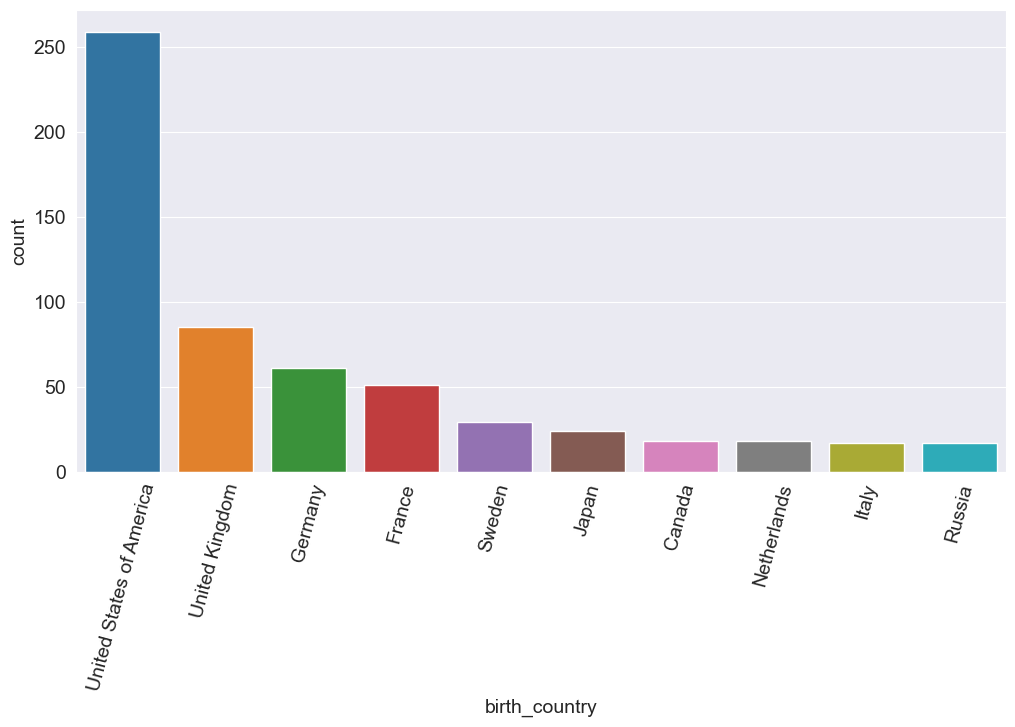

In [29]:
plt.figure(figsize = (12, 6))
sns.barplot(x = nobel_winner_country["birth_country"], y = nobel_winner_country["count"])
plt.xticks(rotation = 75);

In [80]:
nobel_country[["birth_country", "count"]]

,birth_country,count
0,United States of America,259
1,United Kingdom,85
2,Germany,61
3,France,51
4,Sweden,29
...,...,...
116,Bosnia (Bosnia and Herzegovina),1
117,Southern Rhodesia (Zimbabwe),1
118,Brazil,1
119,Iceland,1


In [33]:
nobel_df.sex.unique()

array(['Male', 'Female', nan], dtype=object)

In [34]:
nobel_df_female = nobel_df[nobel_df["sex"] == "Female"].sort_values(by = "year", ascending = True)
nobel_df_female[["full_name", "year", "category"]].head(10)

,full_name,year,category
19,"Marie Curie, née Sklodowska",1903,Physics
29,"Baroness Bertha Sophie Felicita von Suttner, n...",1905,Peace
51,Selma Ottilia Lovisa Lagerlöf,1909,Literature
62,"Marie Curie, née Sklodowska",1911,Chemistry
128,Grazia Deledda,1926,Literature
141,Sigrid Undset,1928,Literature
160,Jane Addams,1931,Peace
179,Irène Joliot-Curie,1935,Chemistry
198,Pearl Buck,1938,Literature
218,Gabriela Mistral,1945,Literature


In [35]:
nobel_df_male = nobel_df[nobel_df["sex"] == "Male"].sort_values(by = "year", ascending = True)
nobel_df_male[["full_name", "year", "category"]].head(10)

,full_name,year,category
0,Jacobus Henricus van 't Hoff,1901,Chemistry
1,Sully Prudhomme,1901,Literature
2,Emil Adolf von Behring,1901,Medicine
3,Jean Henry Dunant,1901,Peace
4,Frédéric Passy,1901,Peace
5,Wilhelm Conrad Röntgen,1901,Physics
11,Hendrik Antoon Lorentz,1902,Physics
10,Charles Albert Gobat,1902,Peace
9,Élie Ducommun,1902,Peace
12,Pieter Zeeman,1902,Physics


In [81]:
nobel_country["count"].idxmax()

0

In [82]:
nobel_country.loc[nobel_country["count"].idxmax(), "birth_country"]

'United States of America'

In [83]:
nobel_winner_max = nobel_df["birth_country"] == nobel_country.loc[nobel_country["count"].idxmax(), "birth_country"]

In [84]:
nobel_df[nobel_winner_max][["category", "years"]]

,category,years
35,Peace,1900s
72,Peace,1910s
79,Chemistry,1910s
95,Peace,1910s
117,Physics,1920s
...,...,...
876,Chemistry,2010s
878,Chemistry,2010s
881,Medicine,2010s
890,Chemistry,2010s


In [38]:
nobel_us = nobel_df[nobel_winner_max][["category", "years"]]

In [39]:
nobel_us

,category,years
35,Peace,1900s
72,Peace,1910s
79,Chemistry,1910s
95,Peace,1910s
117,Physics,1920s
...,...,...
876,Chemistry,2010s
878,Chemistry,2010s
881,Medicine,2010s
890,Chemistry,2010s


In [40]:
nobel_us_years = nobel_us.groupby('years').size().reset_index(name='count')

In [41]:
nobel_us_years

,years,count
0,1900s,1
1,1910s,3
2,1920s,4
3,1930s,14
4,1940s,13
5,1950s,21
6,1960s,21
7,1970s,33
8,1980s,31
9,1990s,42


In [42]:
nobel_us_years_sorted = nobel_us_years.sort_values("years", ascending = True)

In [43]:
nobel_us_years_sorted

,years,count
0,1900s,1
1,1910s,3
2,1920s,4
3,1930s,14
4,1940s,13
5,1950s,21
6,1960s,21
7,1970s,33
8,1980s,31
9,1990s,42


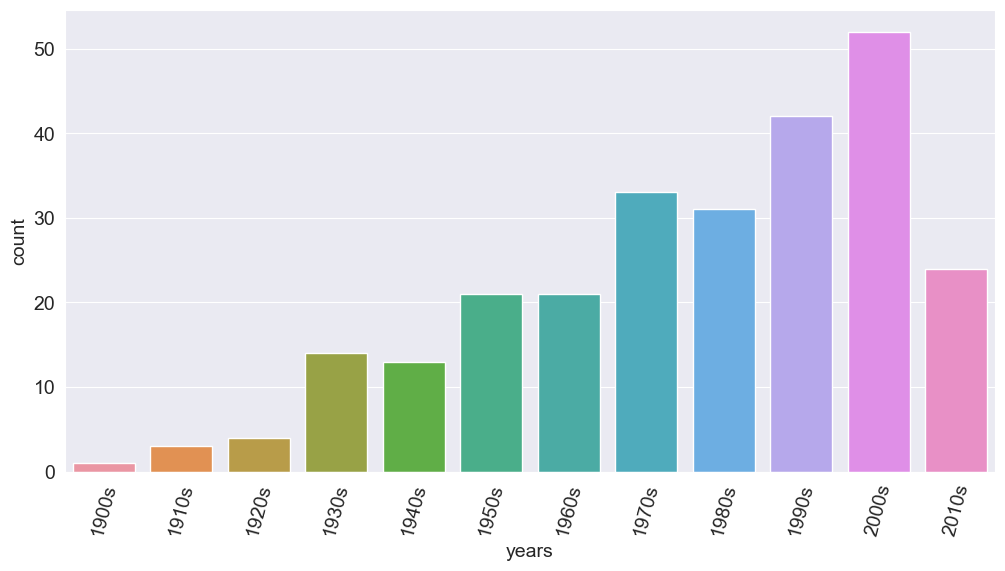

In [44]:
plt.figure(figsize = (12, 6))
sns.barplot(x = nobel_us_years_sorted["years"], y = nobel_us_years_sorted["count"])
plt.xticks(rotation = 75);

<Figure size 1000x200 with 0 Axes>

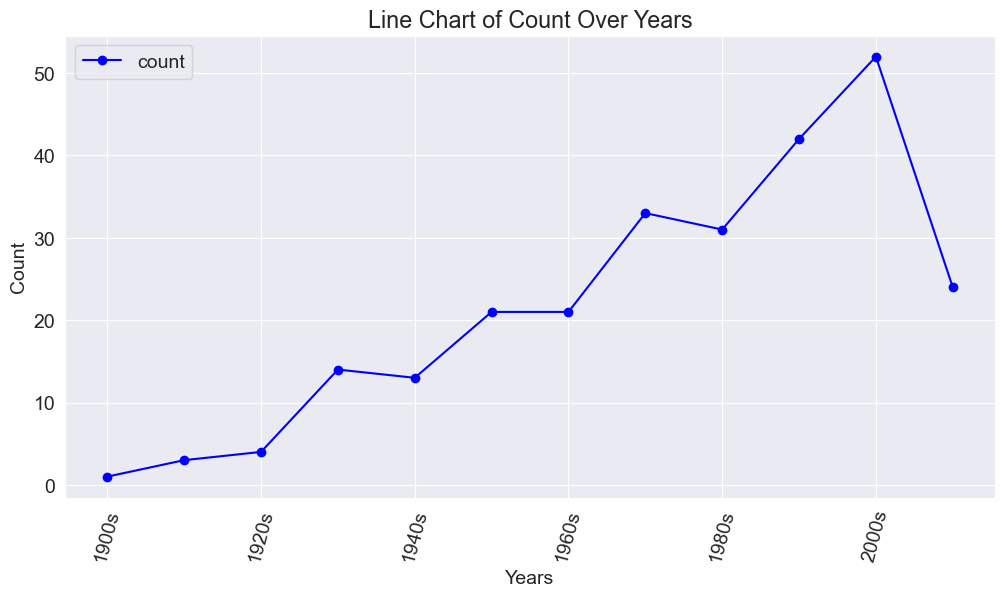

In [45]:
plt.figure(figsize = (10, 2))
nobel_us_years_sorted.plot(x='years', y='count', kind='line', marker='o', linestyle='-', color='b', figsize = (12, 6))
plt.xticks(rotation = 75)
plt.xlabel('Years')
plt.ylabel('Count')
plt.title('Line Chart of Count Over Years');

In [85]:
nobel_df.sample(10)

,full_name,year,category,sex,birth_country,years,age
795,Roger B. Myerson,2007,Economics,Male,United States of America,2000s,56.0
434,Henry A. Kissinger,1973,Peace,Male,Germany,1970s,50.0
734,John B. Fenn,2002,Chemistry,Male,United States of America,2000s,85.0
471,Samuel Chao Chung Ting,1976,Physics,Male,United States of America,1970s,40.0
527,Aaron Klug,1982,Chemistry,Male,Lithuania,1980s,56.0
567,Elie Wiesel,1986,Peace,Male,Romania,1980s,58.0
472,Ilya Prigogine,1977,Chemistry,Male,Russia,1970s,60.0
45,Ilya Ilyich Mechnikov,1908,Medicine,Male,Russian Empire (Ukraine),1900s,63.0
501,Mother Teresa,1979,Peace,Female,Ottoman Empire (Republic of Macedonia),1970s,69.0
133,Heinrich Otto Wieland,1927,Chemistry,Male,Germany,1920s,50.0


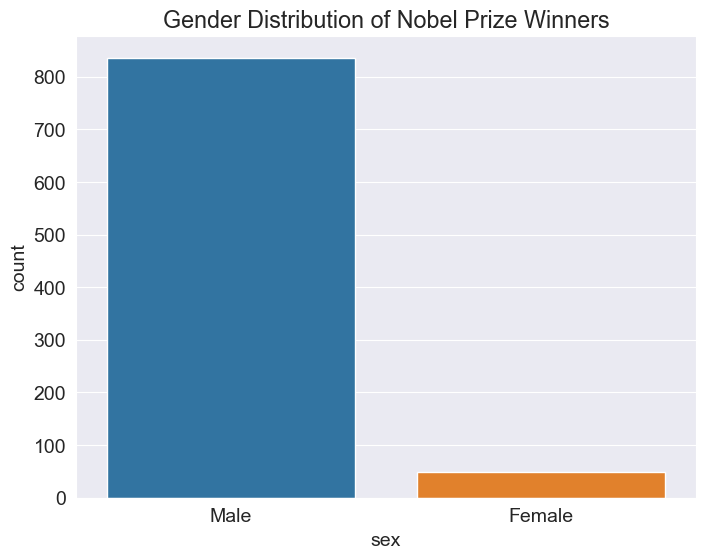

In [46]:
plt.figure(figsize = (8, 6))
sns.countplot(x='sex', data=nobel_df)
plt.title('Gender Distribution of Nobel Prize Winners')
plt.show()

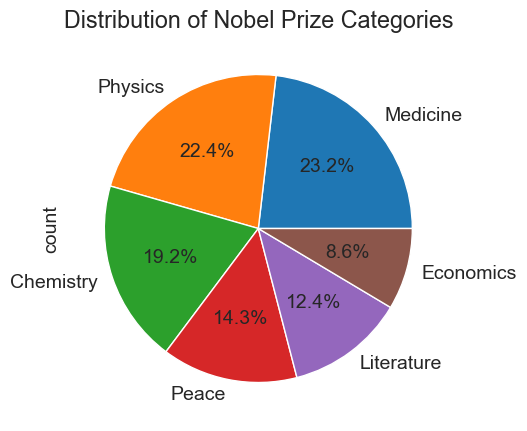

In [47]:
nobel_df['category'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Distribution of Nobel Prize Categories')
plt.show()

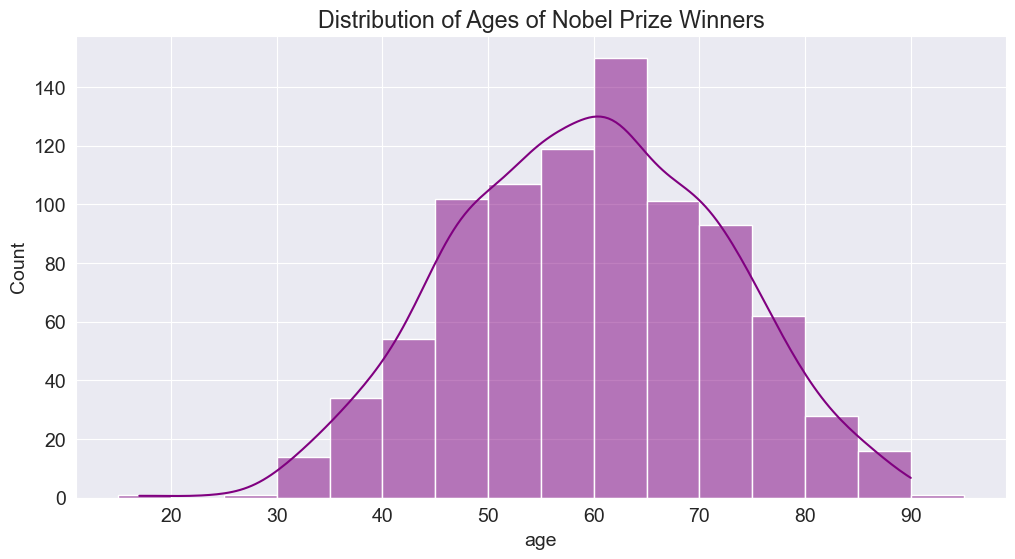

In [48]:
plt.figure(figsize = (12, 6))
sns.histplot(nobel_df['age'], bins=range(15, 100, 5), kde=True, color = "purple")
plt.title('Distribution of Ages of Nobel Prize Winners')
plt.show()

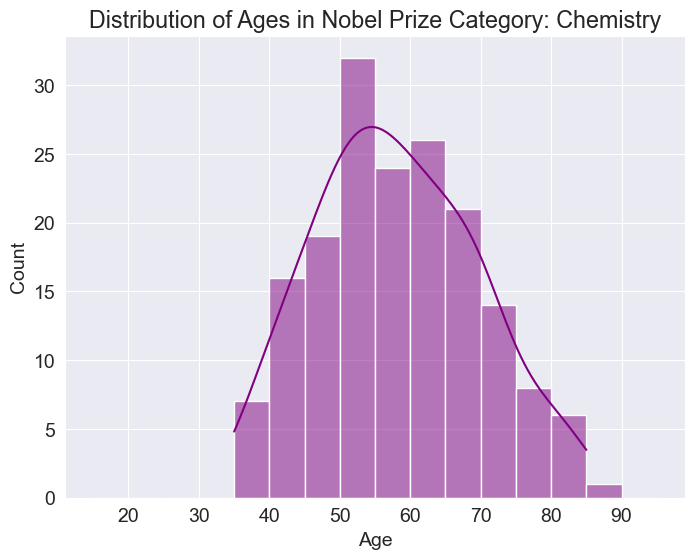

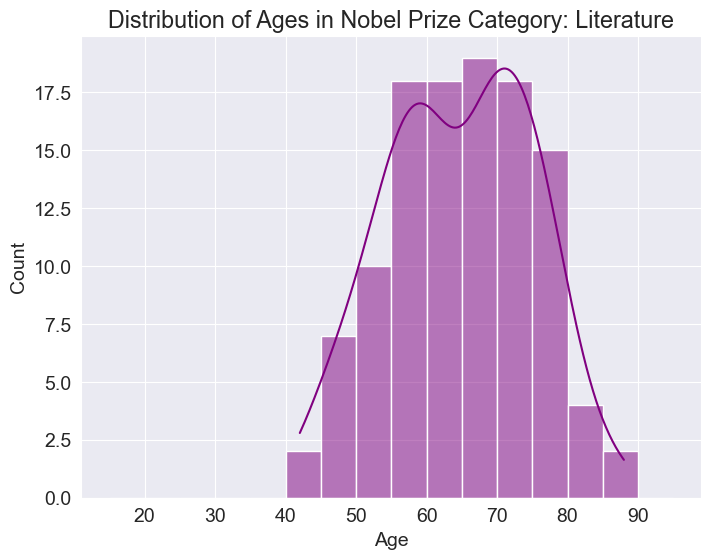

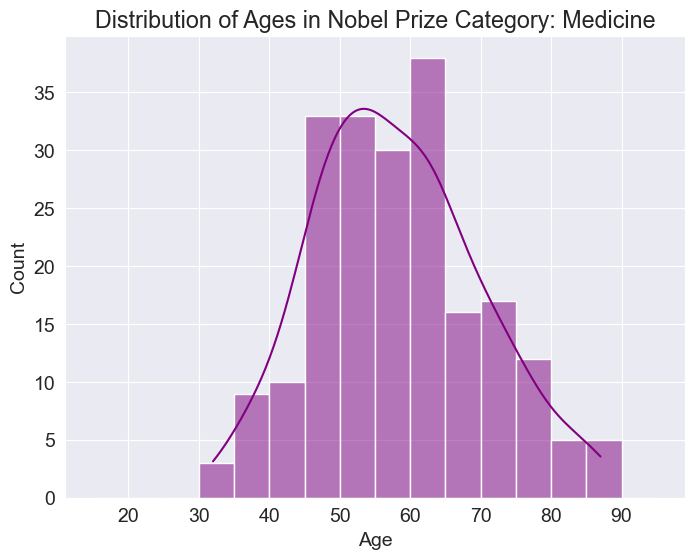

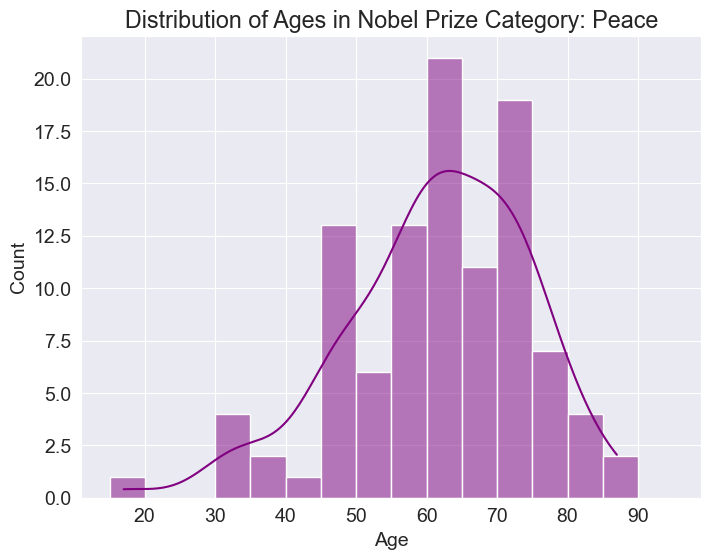

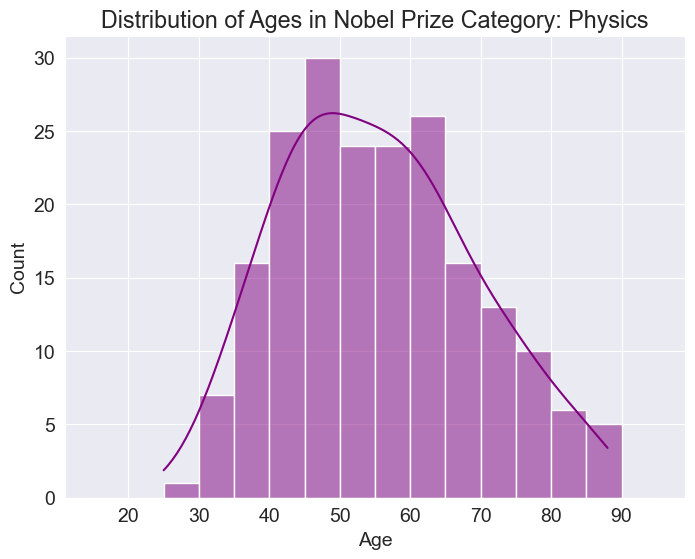

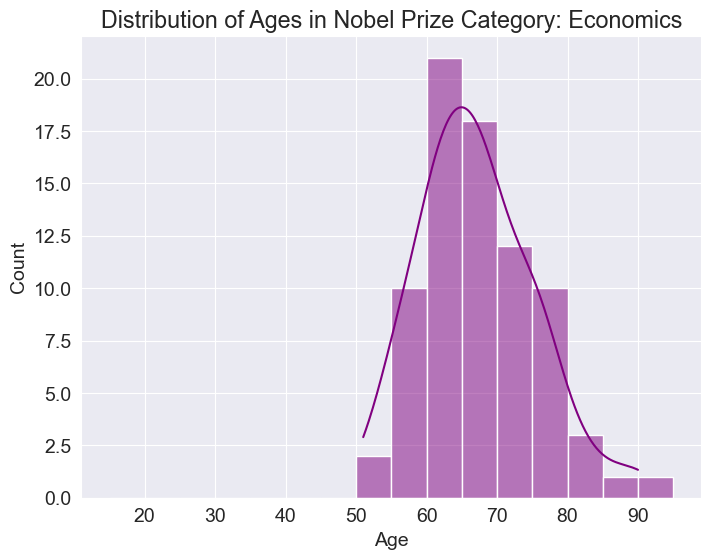

In [49]:
categories = nobel_df['category'].unique()

for category in categories:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=nobel_df[nobel_df['category'] == category], x='age', bins=range(15, 100, 5), color = "purple",kde=True)
    plt.title(f'Distribution of Ages in Nobel Prize Category: {category}')
    plt.xlabel('Age')
    plt.ylabel('Count')
    plt.show()

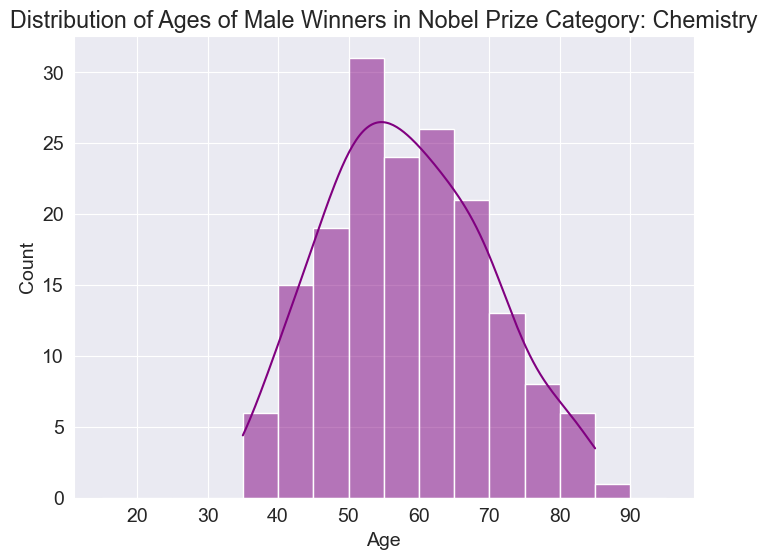

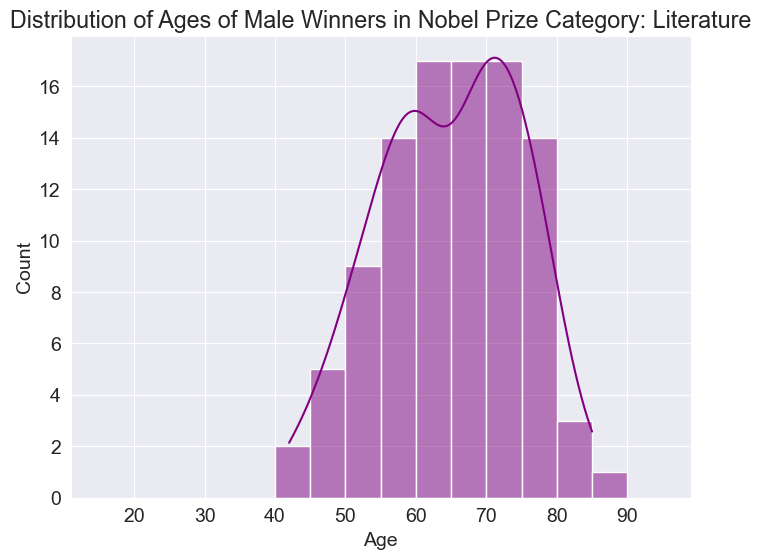

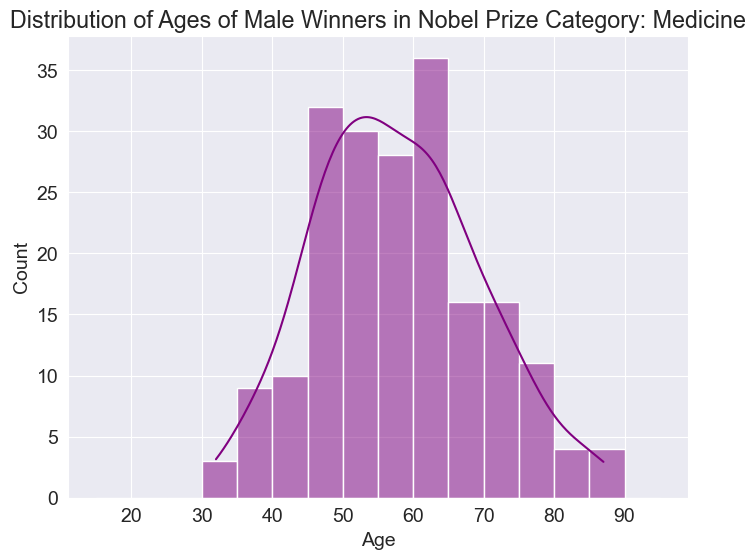

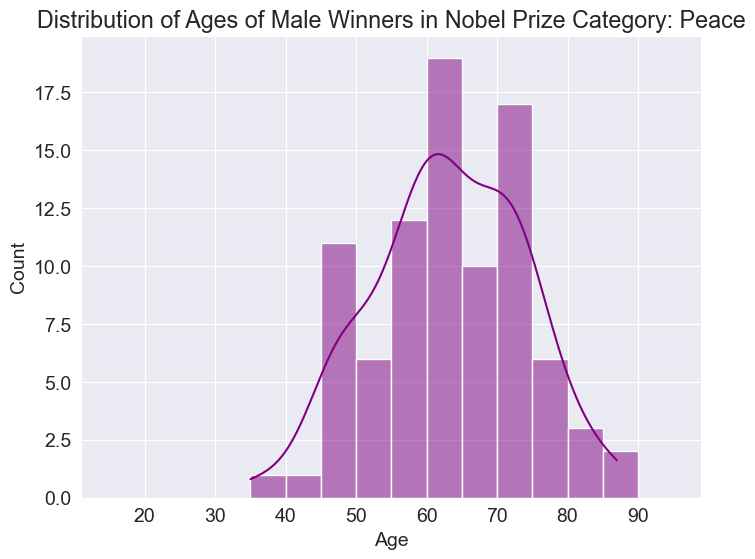

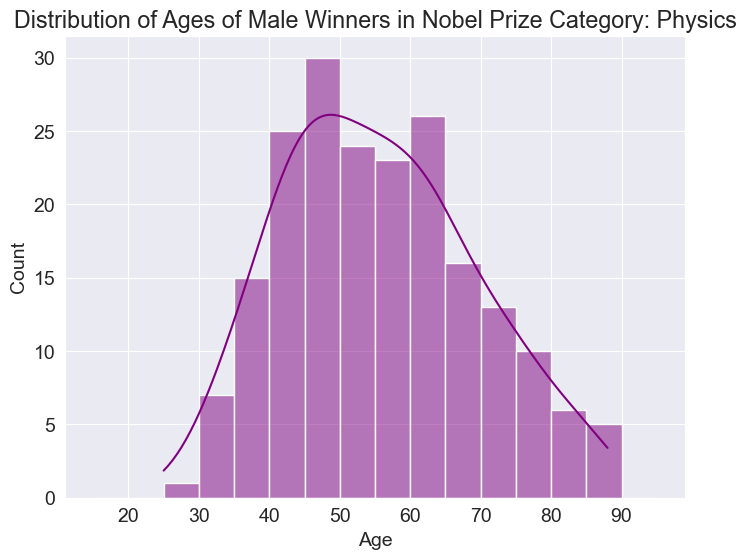

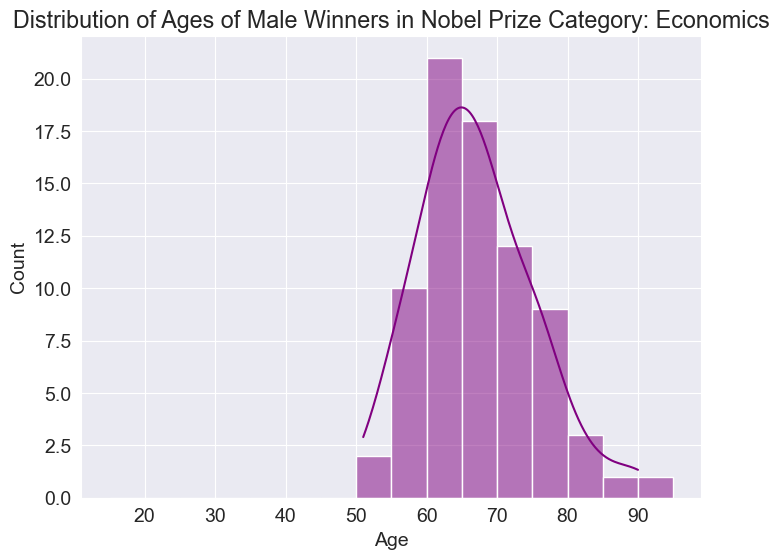

In [50]:
categories_male = nobel_df_male['category'].unique()


for category in categories_male:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=nobel_df_male[nobel_df_male['category'] == category], x='age', bins=range(15, 100, 5), color = "purple",kde=True)
    plt.title(f'Distribution of Ages of Male Winners in Nobel Prize Category: {category}')
    plt.xlabel('Age')
    plt.ylabel('Count')
    plt.show()

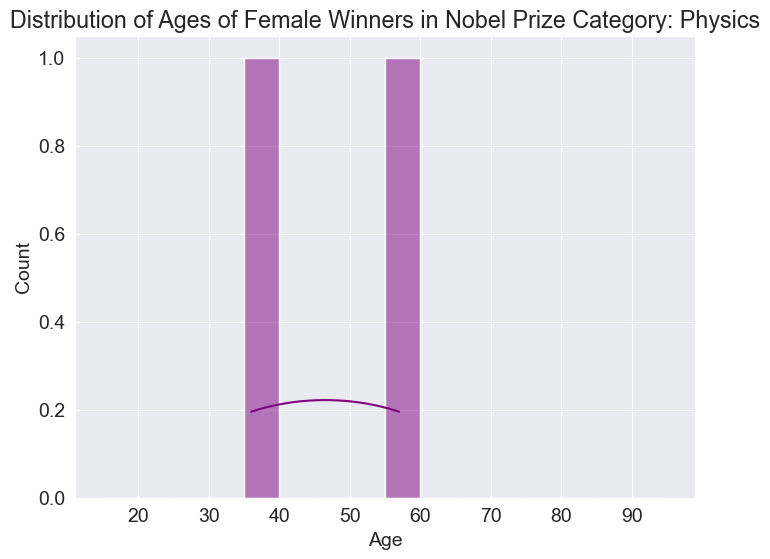

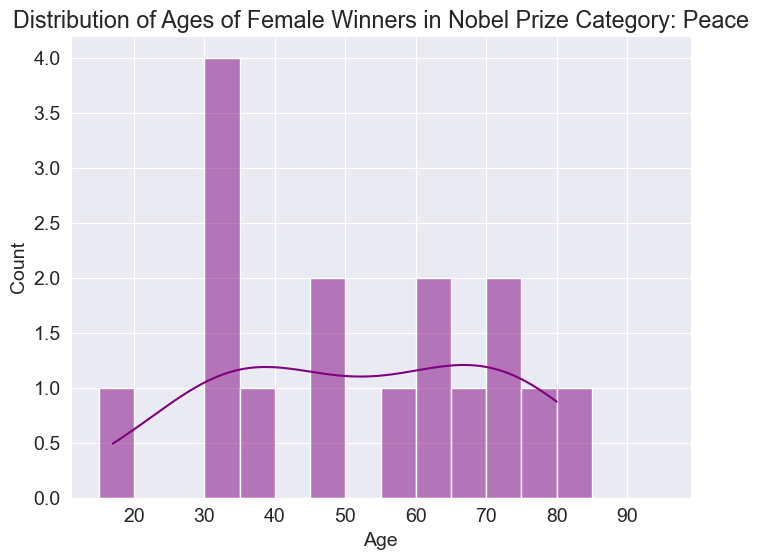

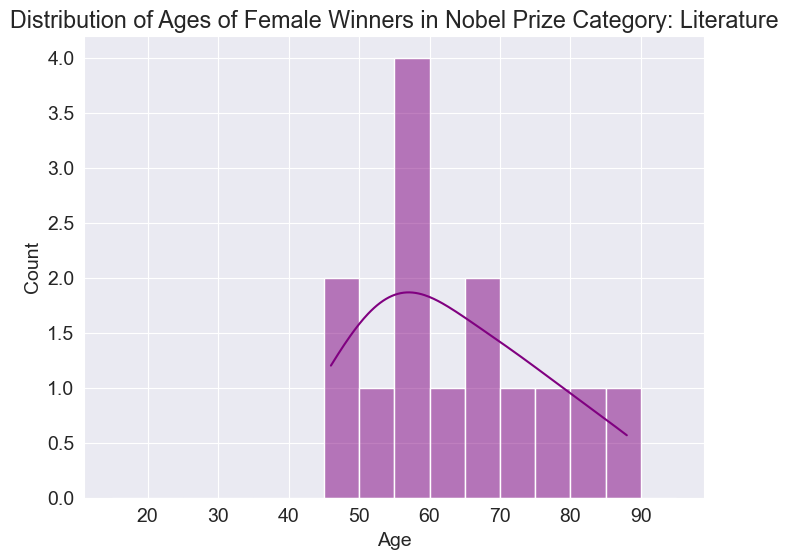

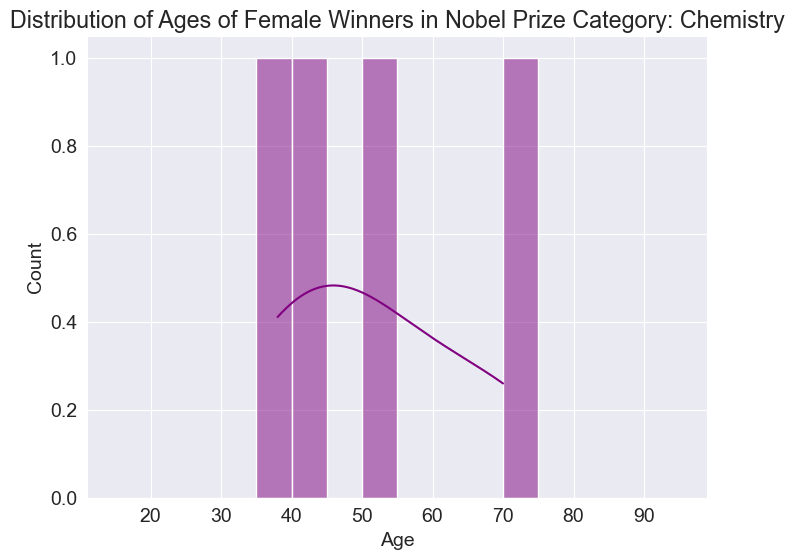

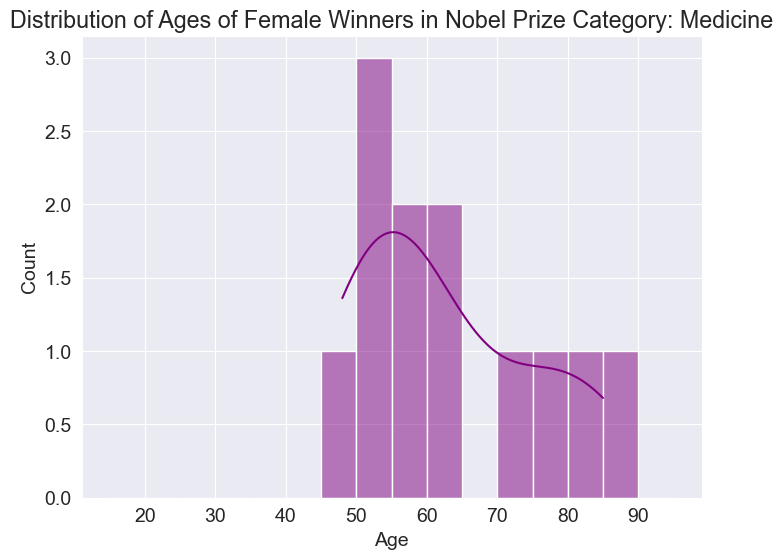

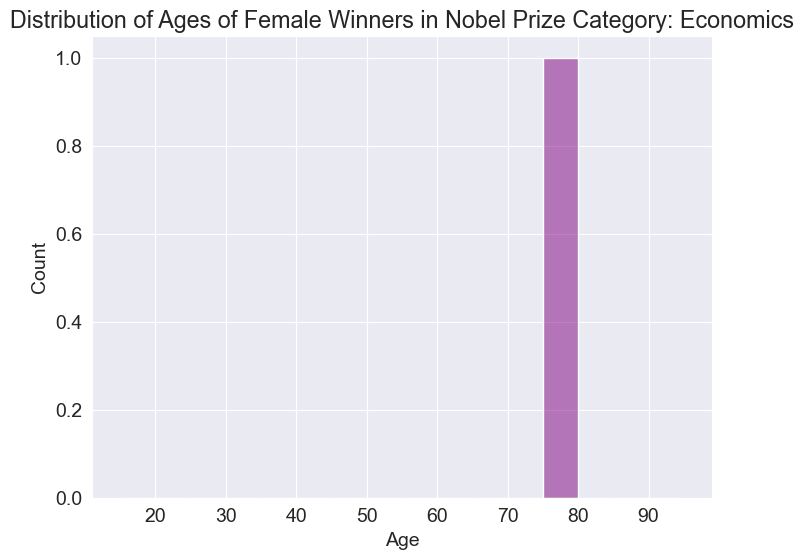

In [51]:
categories_female = nobel_df_female['category'].unique()

for category in categories_female:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=nobel_df_female[nobel_df_female['category'] == category], x='age', bins=range(15, 100, 5), color = "purple",kde=True)
    plt.title(f'Distribution of Ages of Female Winners in Nobel Prize Category: {category}')
    plt.xlabel('Age')
    plt.ylabel('Count')
    plt.show()

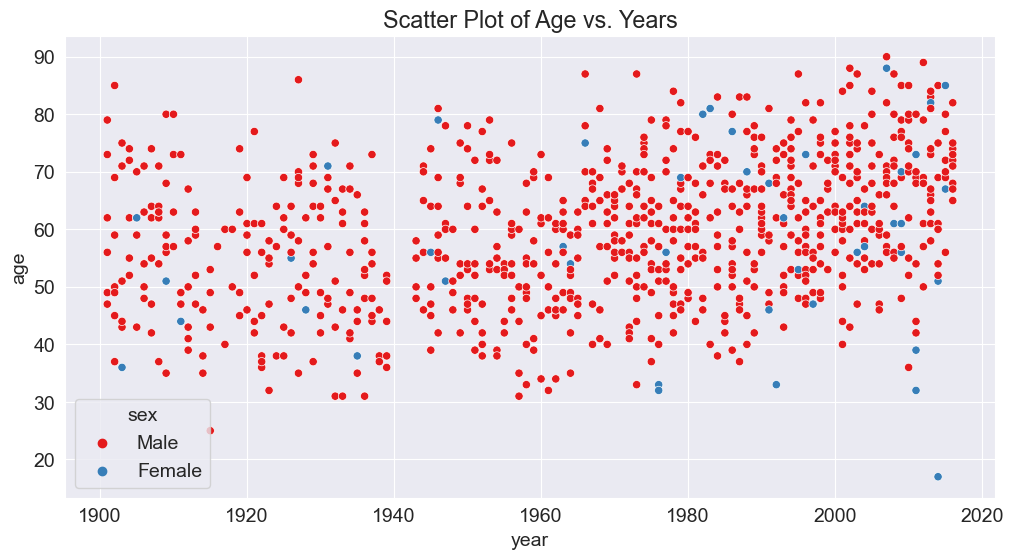

In [52]:
plt.figure(figsize = (12, 6))
sns.scatterplot(x='year', y='age', data=nobel_df, hue='sex', palette='Set1')
plt.title('Scatter Plot of Age vs. Years')
plt.show()

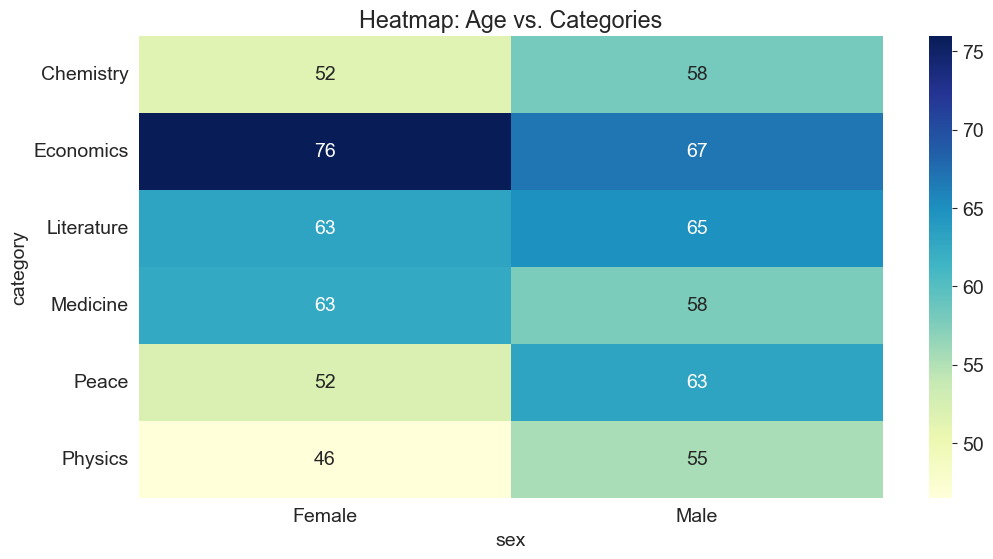

In [53]:
plt.figure(figsize = (12, 6))
heatmap_data = pd.pivot_table(nobel_df, values='age', index='category', columns='sex', aggfunc='mean')
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu')
plt.title('Heatmap: Age vs. Categories')
plt.show()

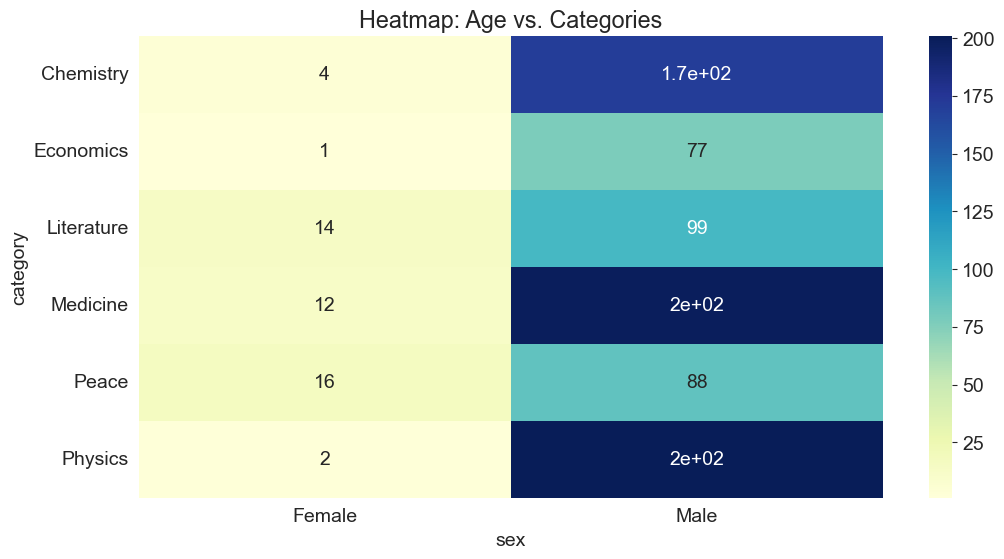

In [86]:
plt.figure(figsize = (12, 6))
heatmap_data = pd.pivot_table(nobel_df, values='age', index='category', columns='sex', aggfunc='count')
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu')
plt.title('Heatmap: Age vs. Categories')
plt.show()

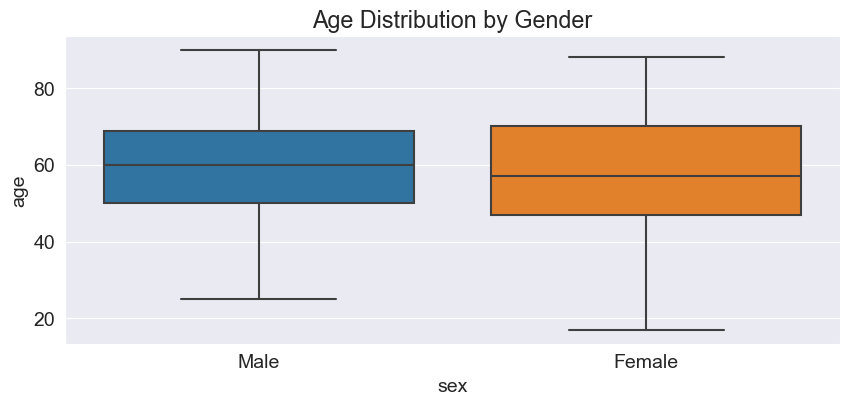

In [54]:
plt.figure(figsize = (10, 4))
sns.boxplot(x='sex', y='age', data=nobel_df)
plt.title('Age Distribution by Gender')
plt.show()

In [55]:
nobel_df.groupby("sex")[["age"]].mean().round()

,age
sex,
Female,58.0
Male,60.0


<Figure size 1700x800 with 0 Axes>

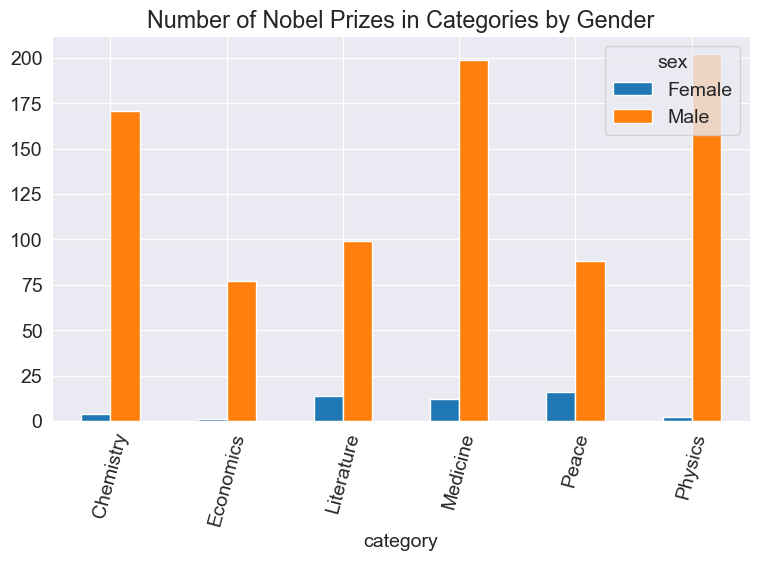

In [56]:
plt.figure(figsize = (17, 8))
pd.crosstab(nobel_df['category'], nobel_df['sex']).plot.bar(stacked=False)
plt.title('Number of Nobel Prizes in Categories by Gender')
plt.xticks(rotation = 75)
plt.show();

<Figure size 1700x800 with 0 Axes>

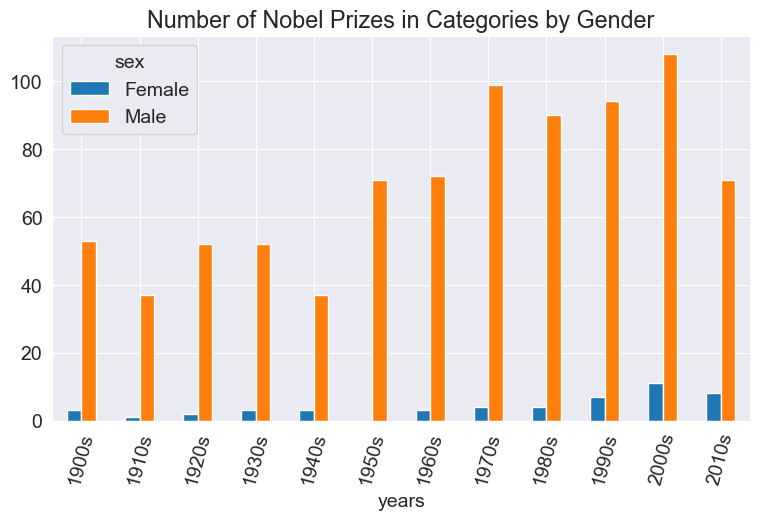

In [57]:
plt.figure(figsize = (17, 8))
pd.crosstab(nobel_df.years, nobel_df['sex']).plot.bar(stacked=False)
plt.title('Number of Nobel Prizes in Categories by Gender')
plt.xticks(rotation = 75)
plt.show();

In [58]:
nobel_df.groupby(['years', 'category', 'sex']).size().reset_index(name='count')


,years,category,sex,count
0,1900s,Chemistry,Female,0
1,1900s,Chemistry,Male,9
2,1900s,Economics,Female,0
3,1900s,Economics,Male,0
4,1900s,Literature,Female,1
...,...,...,...,...
139,2010s,Medicine,Male,14
140,2010s,Peace,Female,4
141,2010s,Peace,Male,3
142,2010s,Physics,Female,0


In [59]:
unique_categories = nobel_df['category'].unique()


for category in unique_categories:
    category_df = nobel_df[nobel_df['category'] == category]
    result_df = category_df.groupby(['years', 'sex']).size().reset_index(name='count')
    
    print(f"\nCategory: {category}\n")
    print(result_df)


Category: Chemistry

    years     sex  count
0   1900s  Female      0
1   1900s    Male      9
2   1910s  Female      1
3   1910s    Male      7
4   1920s  Female      0
5   1920s    Male     10
6   1930s  Female      1
7   1930s    Male     12
8   1940s  Female      0
9   1940s    Male      9
10  1950s  Female      0
11  1950s    Male     14
12  1960s  Female      1
13  1960s    Male     14
14  1970s  Female      0
15  1970s    Male     15
16  1980s  Female      0
17  1980s    Male     21
18  1990s  Female      0
19  1990s    Male     18
20  2000s  Female      1
21  2000s    Male     24
22  2010s  Female      0
23  2010s    Male     18

Category: Literature

    years     sex  count
0   1900s  Female      1
1   1900s    Male      9
2   1910s  Female      0
3   1910s    Male      9
4   1920s  Female      2
5   1920s    Male      8
6   1930s  Female      1
7   1930s    Male      8
8   1940s  Female      1
9   1940s    Male      5
10  1950s  Female      0
11  1950s    Male     10
12  1

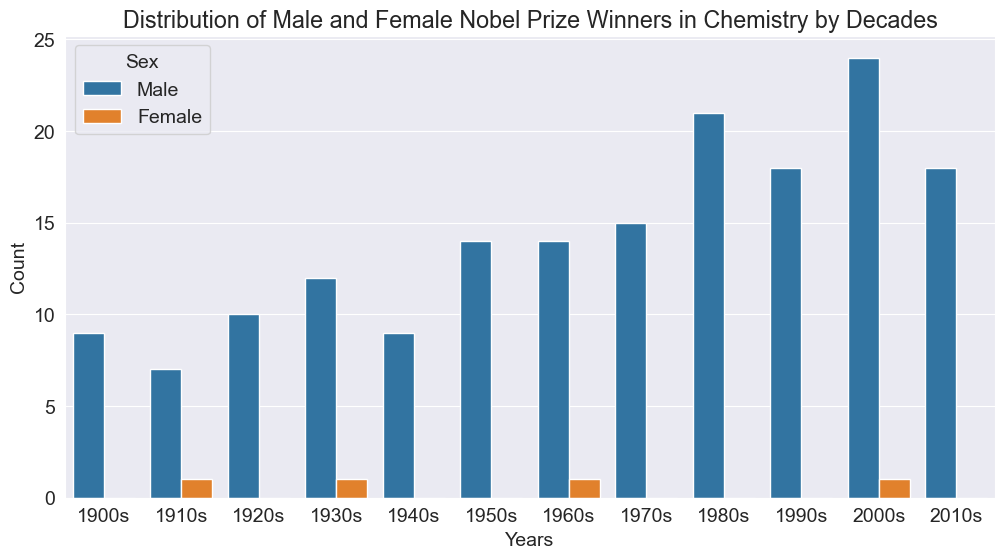

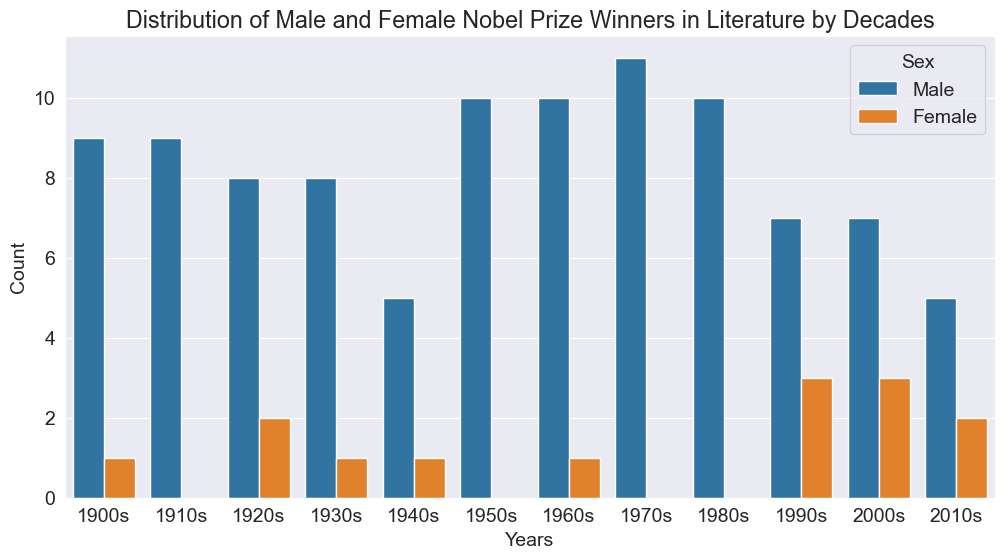

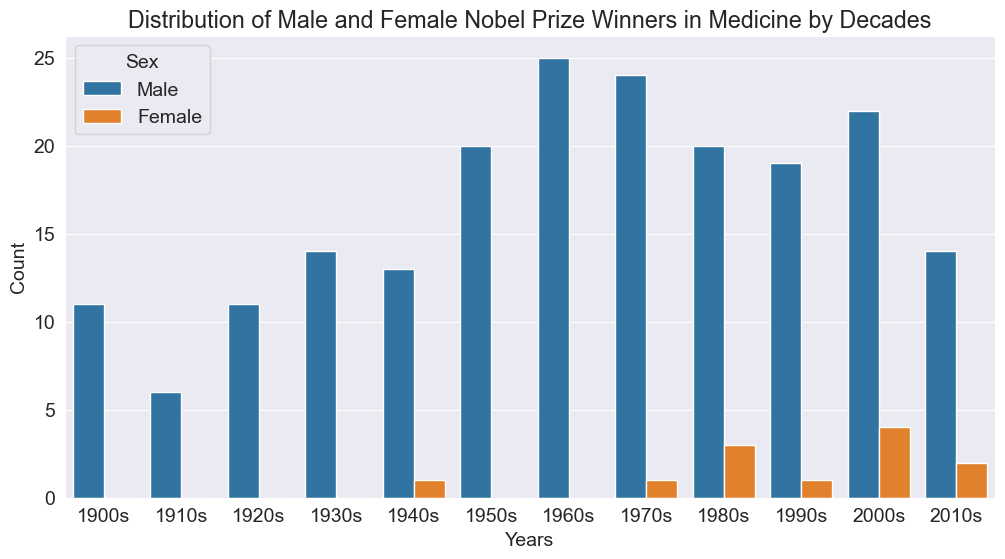

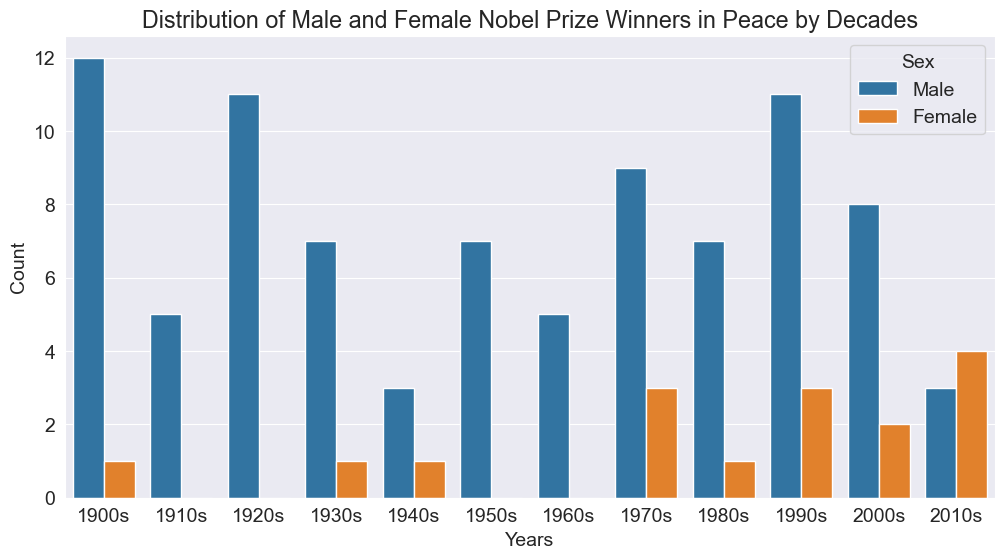

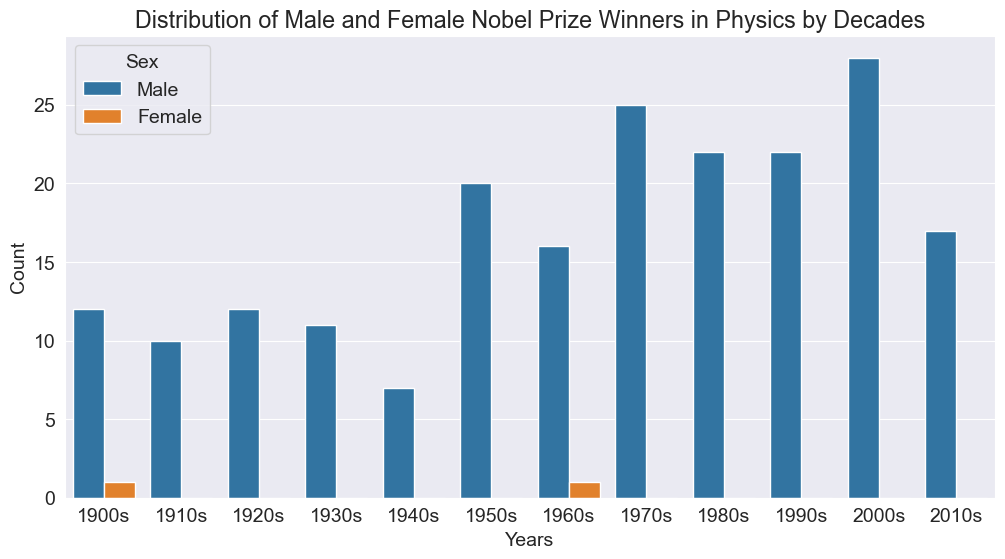

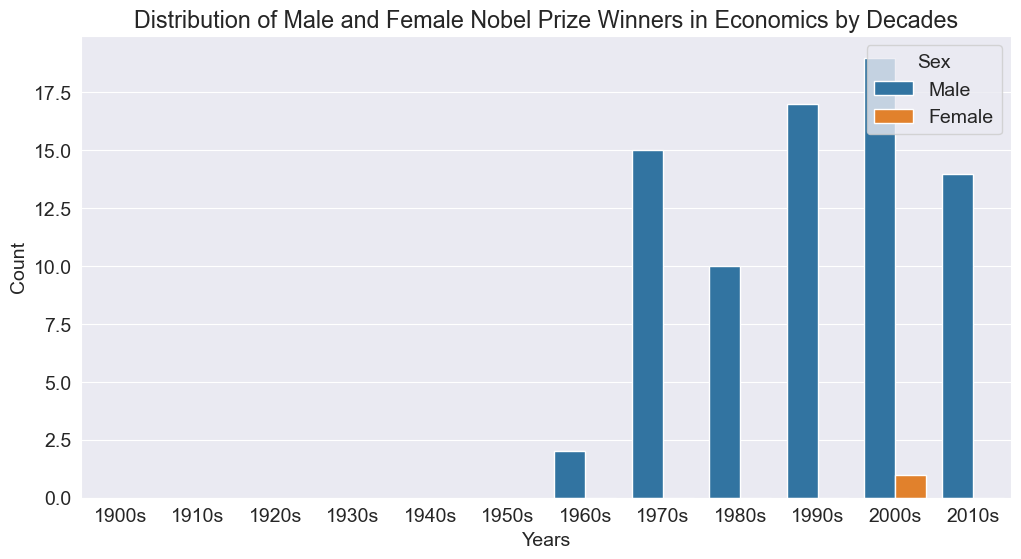

In [60]:
unique_categories = nobel_df['category'].unique()


for category in unique_categories:
    plt.figure(figsize=(12, 6))
    sns.countplot(data=nobel_df[nobel_df['category'] == category], x='years', hue='sex', order=sorted(nobel_df['years'].unique()))
    plt.title(f'Distribution of Male and Female Nobel Prize Winners in {category} by Decades')
    plt.xlabel('Years')
    plt.ylabel('Count')
    plt.legend(title='Sex')
    plt.show();

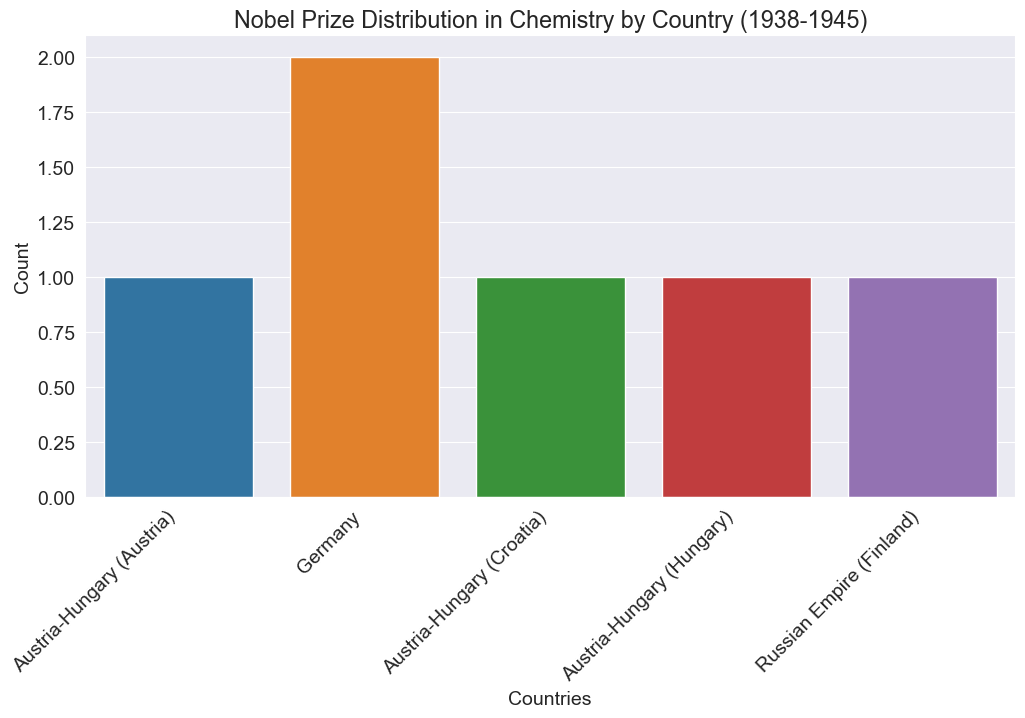

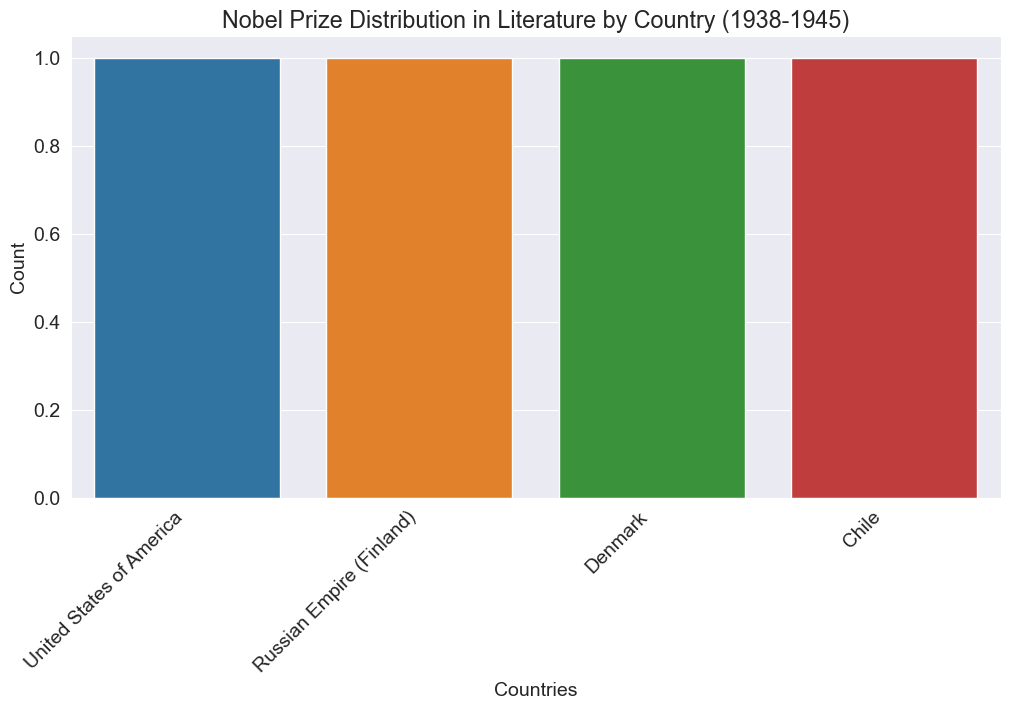

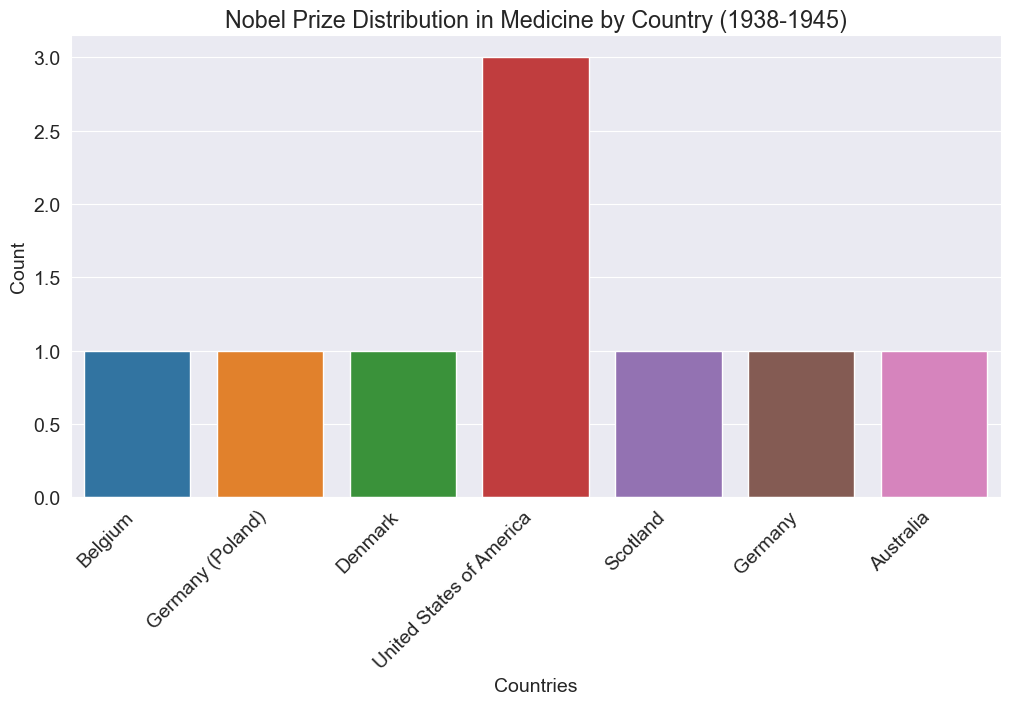

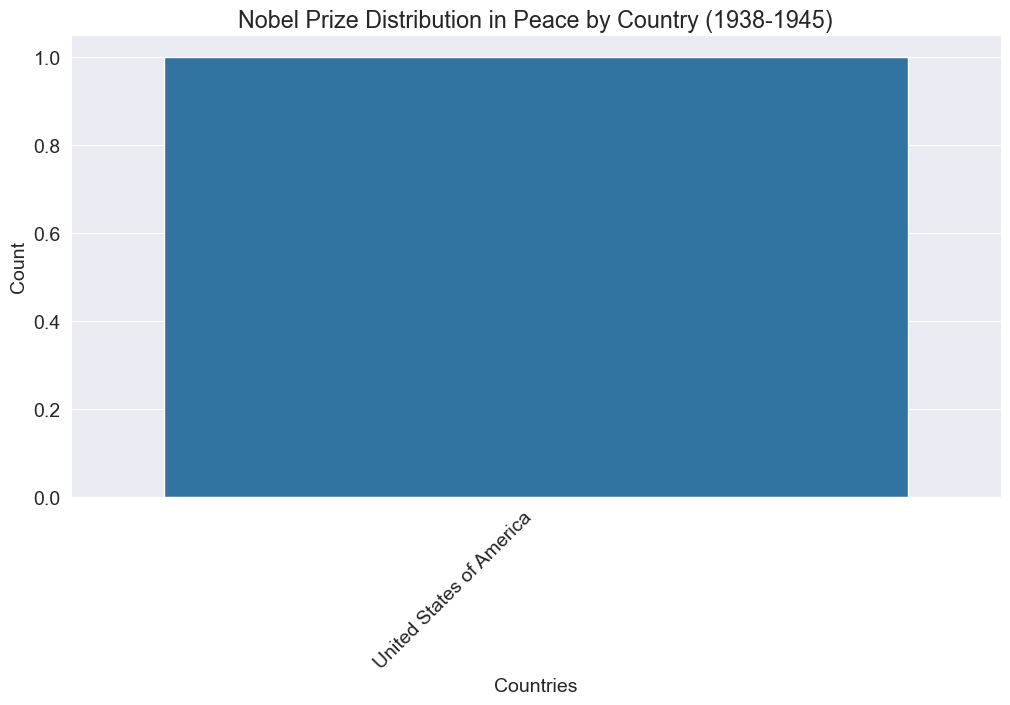

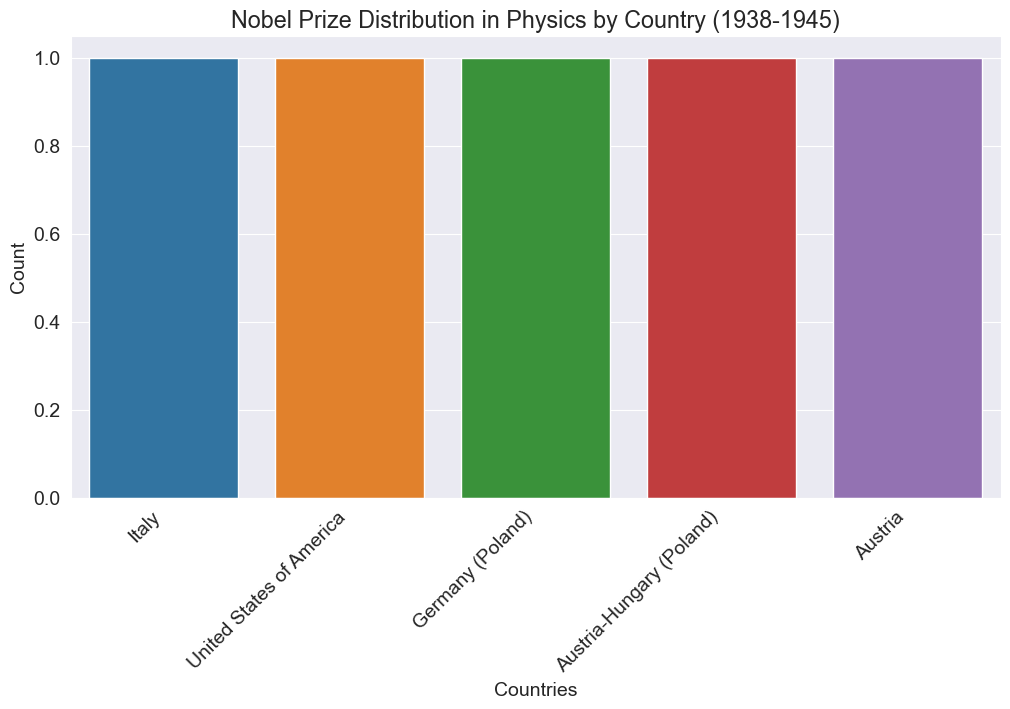

In [61]:
filtered_df_2 = nobel_df[(nobel_df['year'] >= 1938) & (nobel_df['year'] <= 1945)]


unique_categories = filtered_df_2['category'].unique()


for category in unique_categories:
    plt.figure(figsize=(12, 6))
    sns.countplot(x='birth_country', data=filtered_df_2[filtered_df_2['category'] == category])
    plt.title(f'Nobel Prize Distribution in {category} by Country (1938-1945)')
    plt.xlabel('Countries')
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.show()

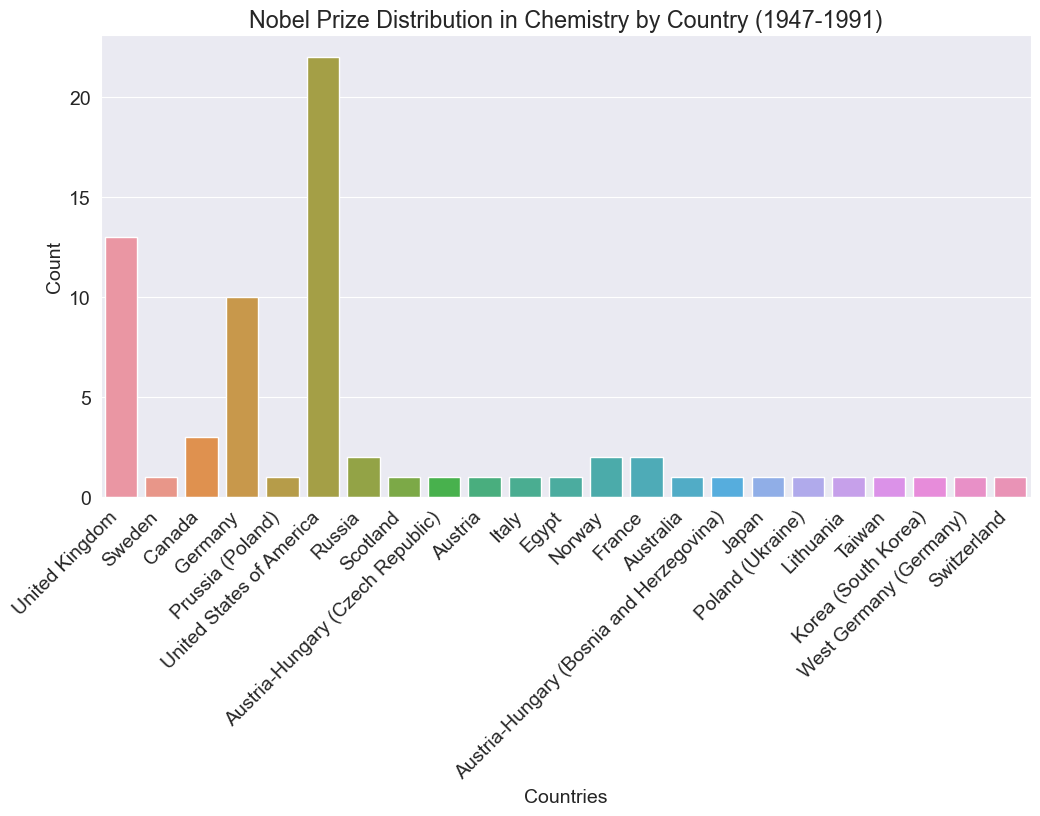

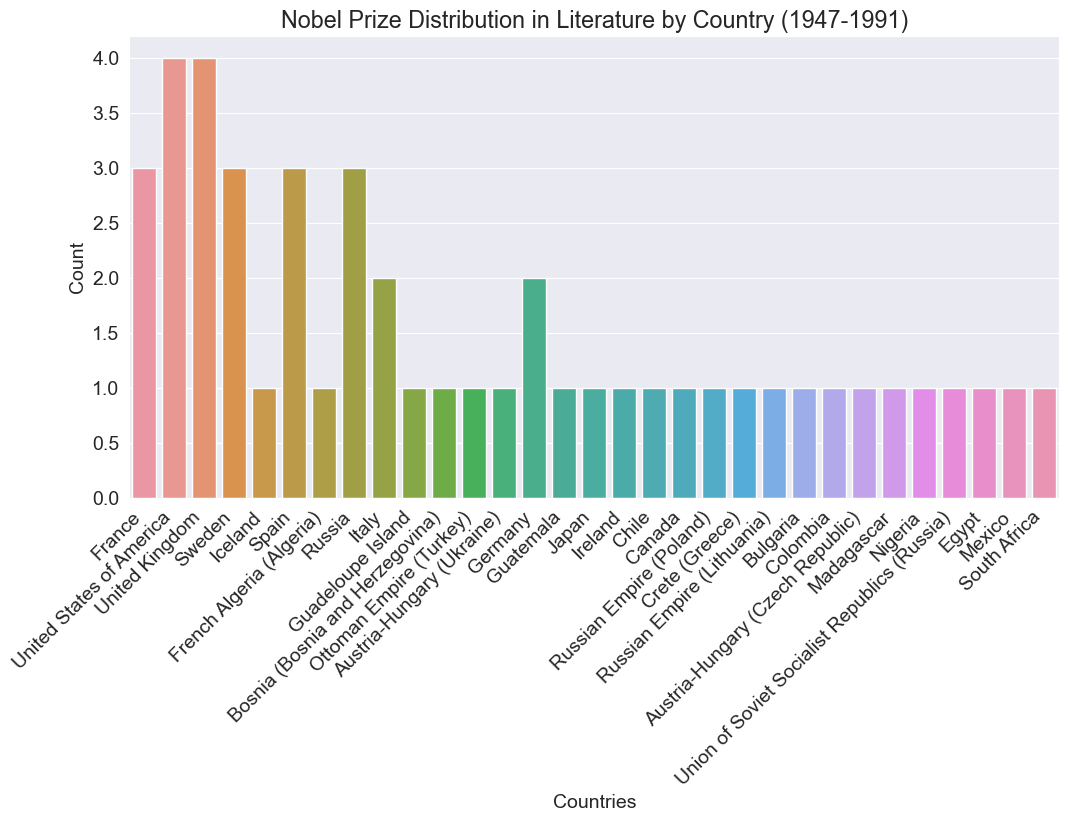

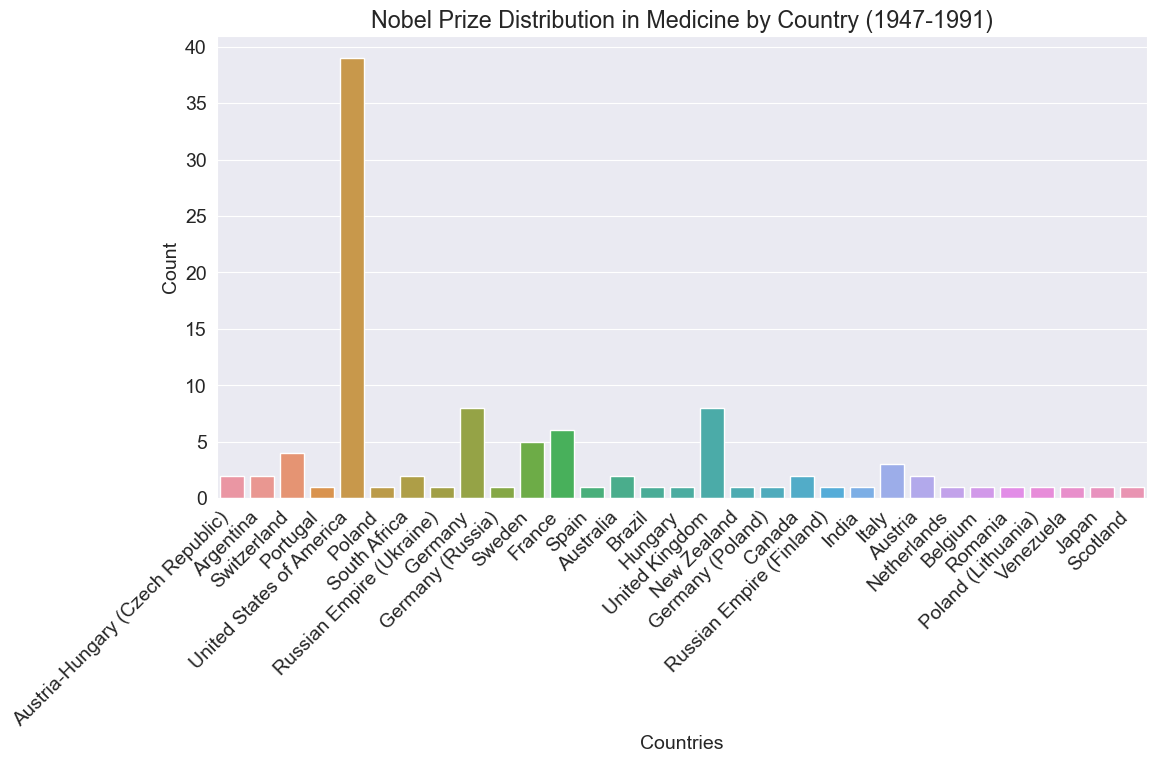

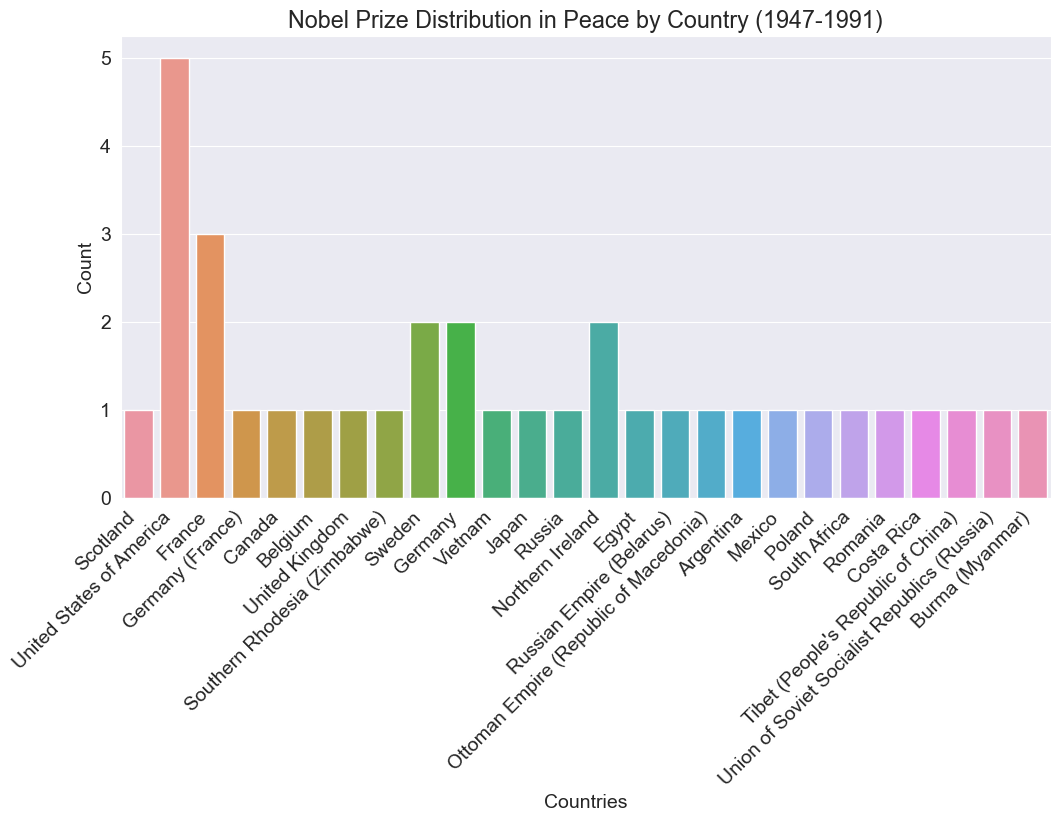

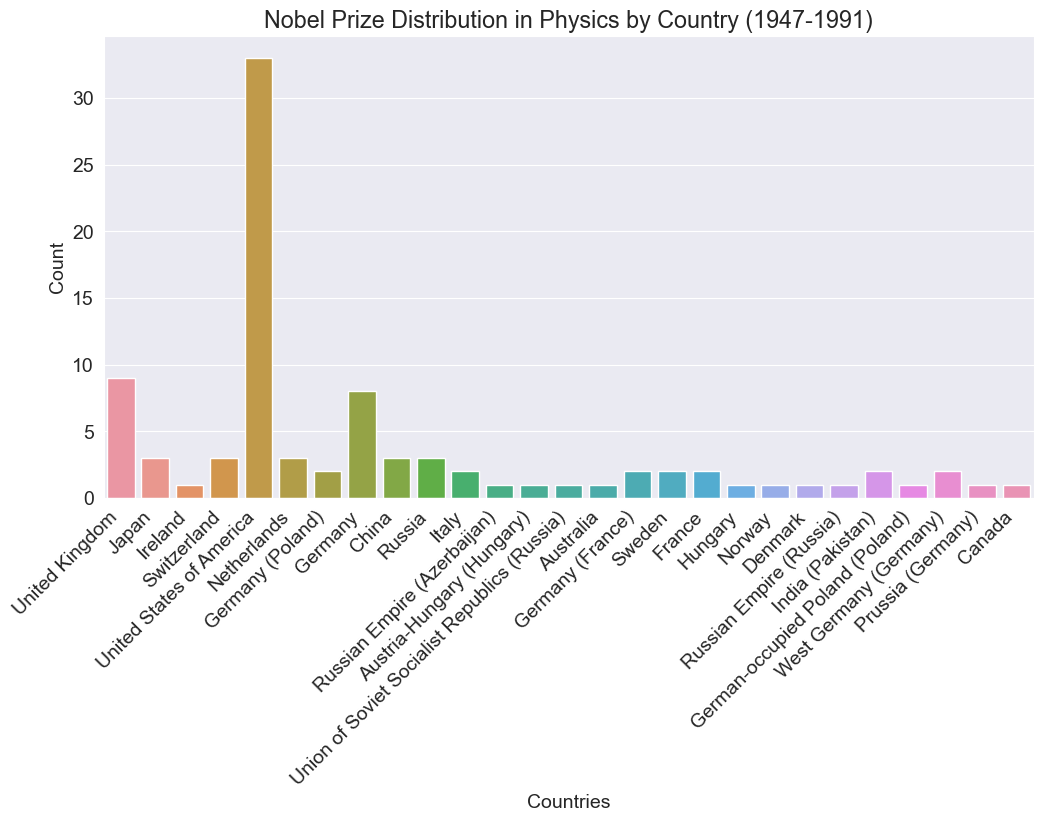

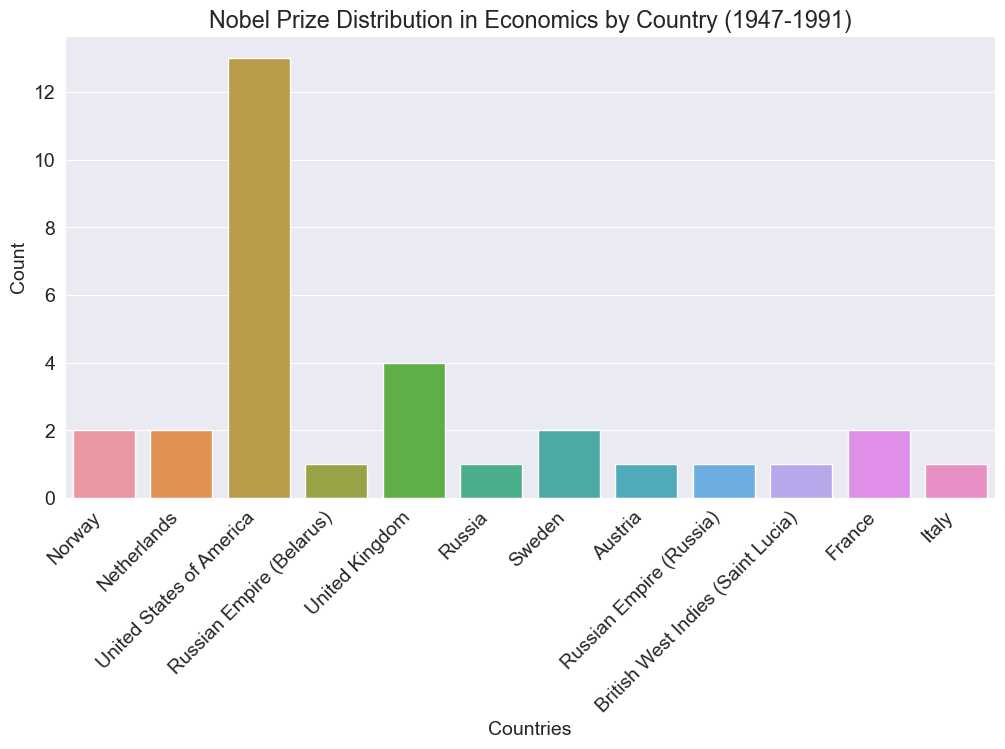

In [62]:
filtered_df_3 = nobel_df[(nobel_df['year'] >= 1947) & (nobel_df['year'] <= 1991)]


unique_categories = filtered_df_3['category'].unique()


for category in unique_categories:
    plt.figure(figsize=(12, 6))
    sns.countplot(x='birth_country', data=filtered_df_3[filtered_df_3['category'] == category])
    plt.title(f'Nobel Prize Distribution in {category} by Country (1947-1991)')
    plt.xlabel('Countries')
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.show()

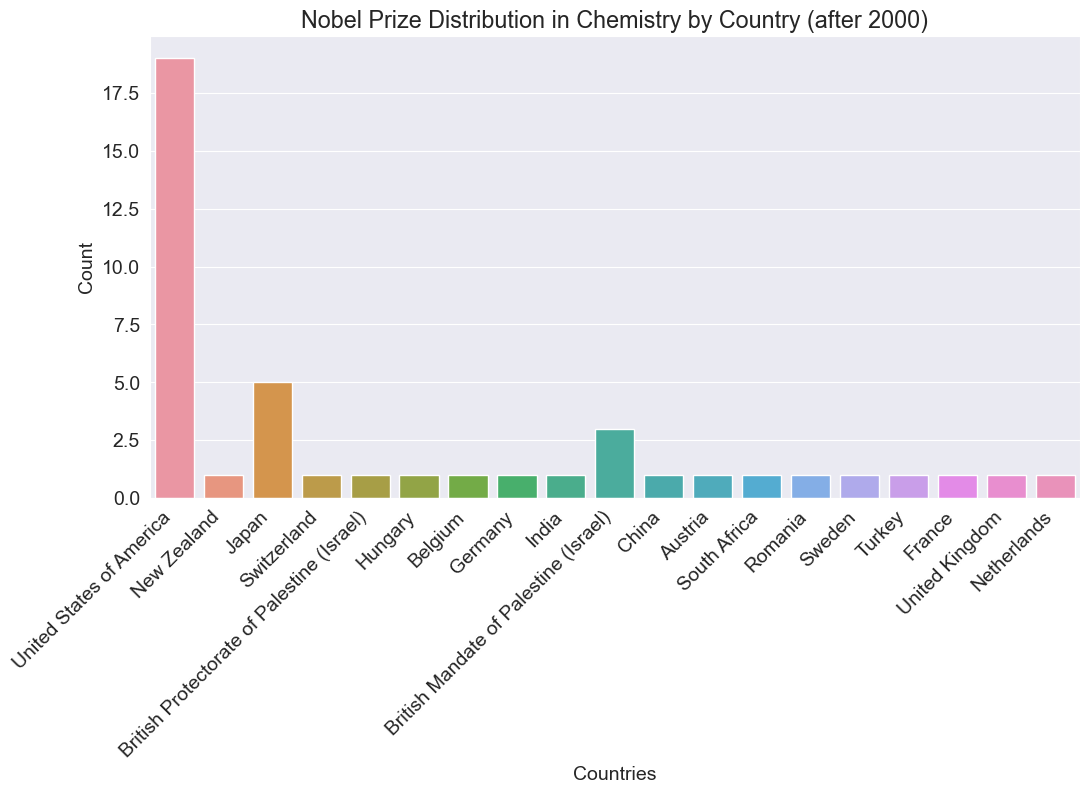

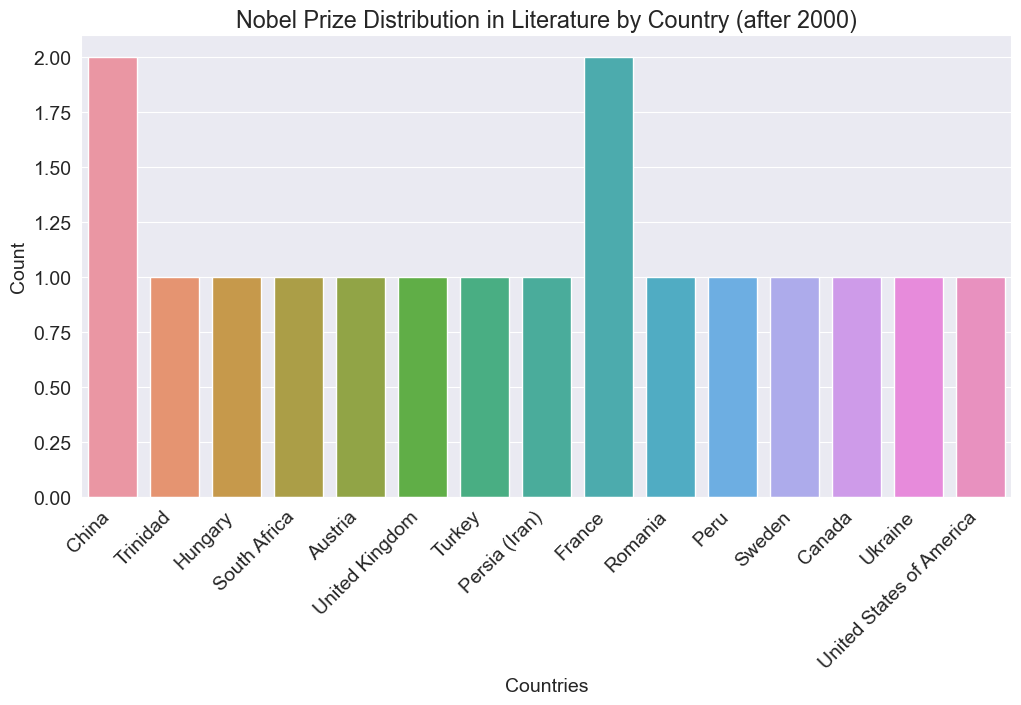

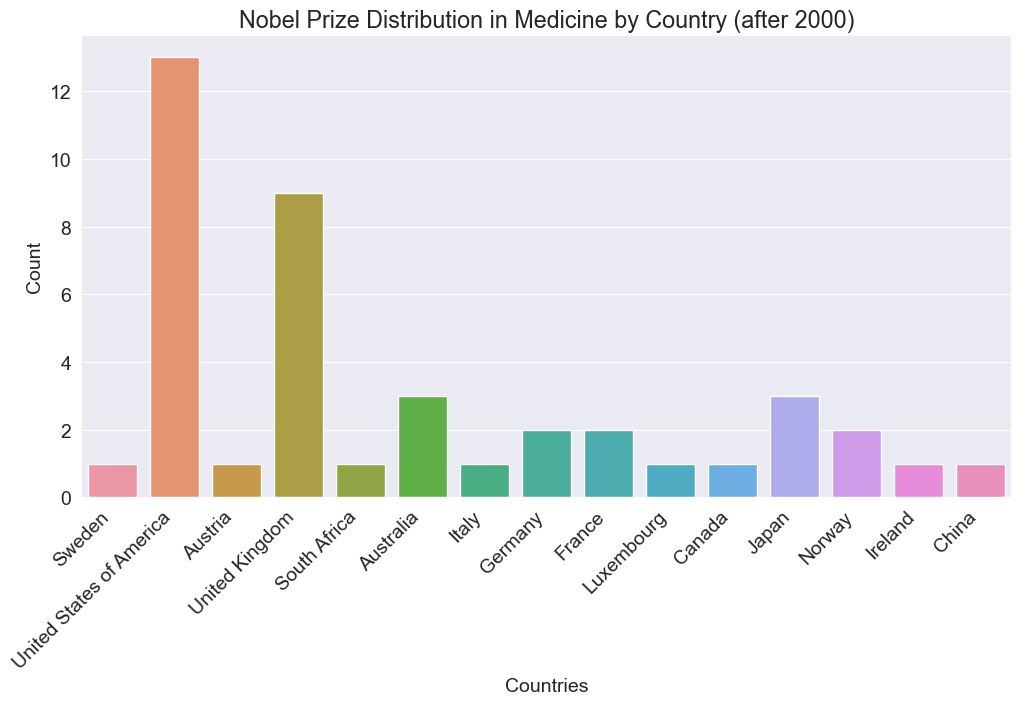

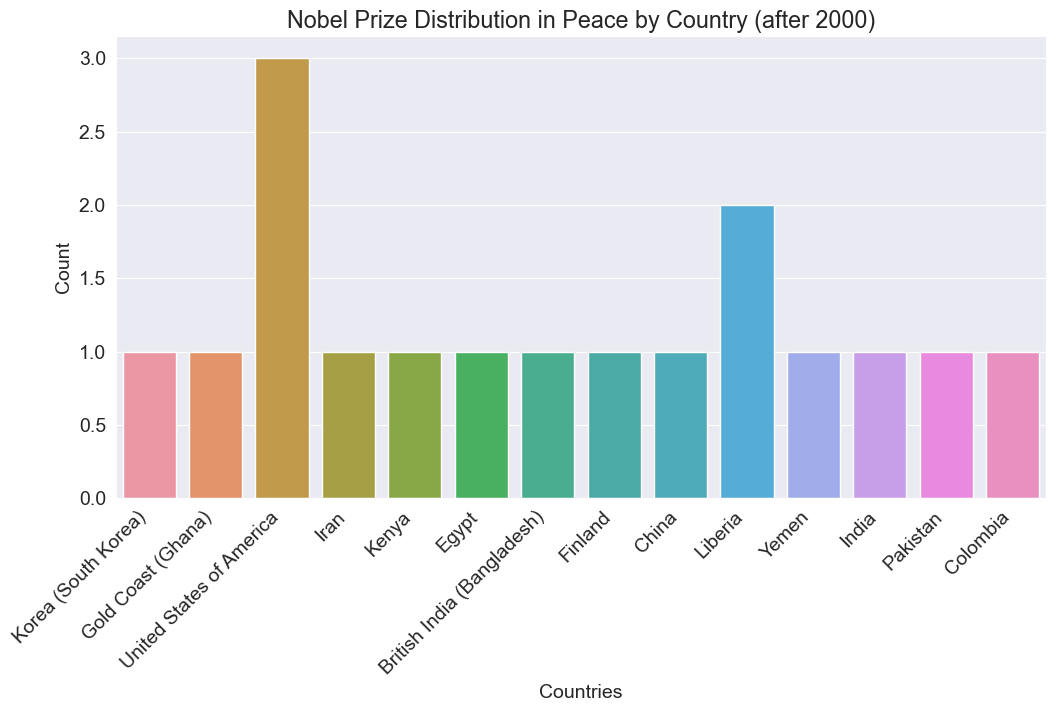

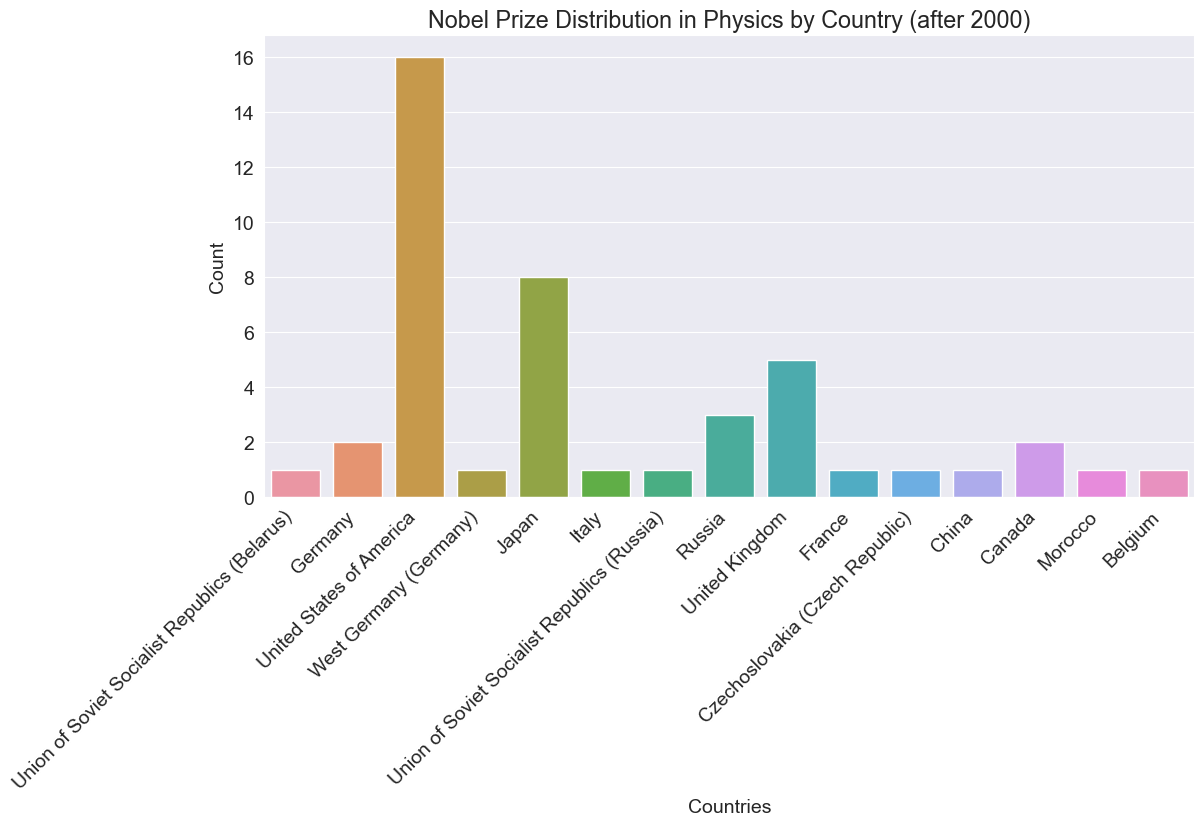

In [63]:
filtered_df_4 = nobel_df[(nobel_df['year'] >= 2000)]


unique_categories = filtered_df_4[filtered_df_4['category'] != "Economics"].category.unique()


for category in unique_categories:
    plt.figure(figsize=(12, 6))
    sns.countplot(x='birth_country', data=filtered_df_4[filtered_df_4['category'] == category])
    plt.title(f'Nobel Prize Distribution in {category} by Country (after 2000)')
    plt.xlabel('Countries')
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.show()